In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/erenbardak/airbnb/Airbnb_Open_Data.csv')

%config InlineBackend.figure_format = 'retina'

/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_77424/3070901228.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/erenbardak/airbnb/Airbnb_Open_Data.csv')


In [2]:
#DROPPING DUPLICATE ROWS
print('Before dropping duplicates:', df.shape)
df = df.drop_duplicates()
print('After dropping the duplicates:', df.shape)

Before dropping duplicates: (102599, 26)
After dropping the duplicates: (102058, 26)


In [3]:
#DROPPING COLUMNS : country, country code, license, host name, host id 
df = df.drop(['country','country code','license','host name','host id'], axis=1)

In [4]:
#COLUMN : id

#Changing the type as category
df['id'] = df['id'].astype('category')

In [5]:
#COLUMN : Host Identity Verified

#Changing the type as category
df['host_identity_verified'] = df['host_identity_verified'].astype('category')

df['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    50944
verified       50825
Name: count, dtype: int64

In [6]:
#COLUMN : Neighbourhood Group

#Merging the misspellings: manhatan and brookln
df['neighbourhood group'] = df['neighbourhood group'].replace('manhatan','Manhattan')
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln','Brooklyn')

#Changing the type as category
df['neighbourhood group'] = df['neighbourhood group'].astype('category')

In [7]:
#COLUMN : Neighbourhood

#Changing the type as category
df['neighbourhood'] = df['neighbourhood'].astype('category')



In [8]:
#COLUMNS : lat and long

#Imputting missing values with the mean lat long of their neighborhoods

#Manhattan East Village
manhattan_eastvillage = df[(df['neighbourhood group'] == 'Manhattan') & (df['neighbourhood'] == 'East Village')]
df.loc[(df['lat'].isna()) & (df['id'] == '1442624'), 'lat'] = manhattan_eastvillage['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1442624'), 'long'] = manhattan_eastvillage['long'].mean()

#Manhattan West Village
manhattan_westvillage = df[(df['neighbourhood group'] == 'Manhattan') & (df['neighbourhood'] == 'West Village')]
df.loc[(df['lat'].isna()) & (df['id'] == '1450908'), 'lat'] = manhattan_westvillage['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1450908'), 'long'] = manhattan_westvillage['long'].mean()

#Manhattan Flatiron District
manhattan_flatiron = df[(df['neighbourhood group'] == 'Manhattan') & (df['neighbourhood'] == 'Flatiron District')]
df.loc[(df['lat'].isna()) & (df['id'] == '1512766'), 'lat'] = manhattan_flatiron['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1512766'), 'long'] = manhattan_flatiron['long'].mean()

#Manhattan Upper West Side
manhattan_upperwest = df[(df['neighbourhood group'] == 'Manhattan') & (df['neighbourhood'] == 'Upper West Side')]
df.loc[(df['lat'].isna()) & (df['id'] == '1545904'), 'lat'] = manhattan_upperwest['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1545904'), 'long'] = manhattan_upperwest['long'].mean()


#Brooklyn Crown Heights
brooklyn_crown = df[(df['neighbourhood group'] == 'Brooklyn') & (df['neighbourhood'] == 'Crown Heights')]
df.loc[(df['lat'].isna()) & (df['id'] == '1431578'), 'lat'] = brooklyn_crown['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1431578'), 'long'] = brooklyn_crown['long'].mean()

#Brooklyn GreenPoint
brooklyn_green = df[(df['neighbourhood group'] == 'Brooklyn') & (df['neighbourhood'] == 'Greenpoint')]
df.loc[(df['lat'].isna()) & (df['id'] == '1434892'), 'lat'] = brooklyn_green['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1434892'), 'long'] = brooklyn_green['long'].mean()
df.loc[(df['lat'].isna()) & (df['id'] == '1490122'), 'lat'] = brooklyn_green['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1490122'), 'long'] = brooklyn_green['long'].mean()

#Queens Elmhurst
queens_elm = df[(df['neighbourhood group'] == 'Queens') & (df['neighbourhood'] == 'Elmhurst')]
df.loc[(df['lat'].isna()) & (df['id'] == '1434892'), 'lat'] = queens_elm['lat'].mean()
df.loc[(df['long'].isna()) & (df['id'] == '1434892'), 'long'] = queens_elm['long'].mean()


In [9]:
#COLUMN : Instant Bookable

#Changing the type as category
df['instant_bookable'] = df['instant_bookable'].astype('category')

#Mapping the true,false
TF_dict = {True: '1', False: '0'}
df['instant_bookable'] = df['instant_bookable'].map(TF_dict)

In [10]:
#COLUMN : Cancellation Policy

#Changing the type as category
df['cancellation_policy'] = df['cancellation_policy'].astype('category')

In [11]:
#COLUMN : Cancellation Policy

#Changing the type as category
df['cancellation_policy'] = df['cancellation_policy'].astype('category')

In [12]:
#COLUMN : Room Type

#Changing the type as category
df['room type'] = df['room type'].astype('category')

In [13]:
#COLUMN : Construction year -> New Column Created: Building Age

#Changing the type as category
df['Construction year'] = df['Construction year'].astype('category')

In [14]:
#COLUMN : Building_Age

#Sourcing the column from Construction Year
df['Building_Age'] = df['Construction year']

#Mapping the true,false
Year_dict = {2022: 1, 2021: 2,2020: 3,2019: 4,2018: 5,2017: 6,2016: 7,2015: 8,2014: 9,2013: 10,2012: 11,2011: 12,2010: 13,2009: 14,2008: 15,2007: 16,2006: 17,2005: 18, 2004: 19,2003: 20}
df['Building_Age'] = df['Building_Age'].map(Year_dict)
df['Building_Age'] = pd.Series([float(i) for i in df['Building_Age']])

In [15]:
#COLUMN : Price

#Removing the non-numeric characters
df['price'] = pd.to_numeric(df['price'].replace(r'\D','',regex=True))

#Replaces the missing value with the average price
df['price'] = df['price'].fillna(df['price'].mean())

In [16]:
#COLUMN : Service Fee

#Removing the non-numeric characters
df['service fee'] = pd.to_numeric(df['price'].replace(r'\D','',regex=True))

#Replaces the missing value with the average price
df['service fee'] = df['service fee'].fillna(df['service fee'].mean())

In [17]:
#COLUMN : Minimum Nights

#Filtered minimum nights which are below 1 and more than 90 to eliminate the outliers
df = df[(df['minimum nights'] >= 1) & (df['minimum nights'] <= 15)]

In [18]:
#COLUMN : Number of Reviews

#Filled the missing values with the median of the number of reviews.
df['number of reviews'] = df['number of reviews'].fillna(df['number of reviews'].median())

In [19]:
#COLUMN : Last Review

#Changing the type as datetime
df['last review'] = pd.to_datetime(df['last review'],format= '%m/%d/%Y',errors='coerce')

In [20]:
#COLUMN : Review Rate Number

#Filled the missing values with the median value.
df['review rate number'] = df['review rate number'].fillna(df['review rate number'].median())

In [21]:
#COLUMN : Calculated Host Listings Count

#Filled the missing values with the median of the unique values
unique_host_listings = pd.Series(df['calculated host listings count'].unique())
df['calculated host listings count'] = df['calculated host listings count'].fillna(unique_host_listings.median())

In [22]:
#COLUMN : House Rules

#Changing the type as category
df['house_rules'] = df['house_rules'].astype('category')

In [23]:
#COLUMN : Reviews Per Month ?

In [24]:
#COLUMN : Availability 365

#Changing the type as float
df['availability 365'] = df['availability 365'].astype(float)

#removing the rows which have less
df = df[df['availability 365'] <= 365]



In [25]:
#COLUMN : Occupancy

df['Occupancy'] = ((df['reviews per month'] / df['minimum nights'].astype(float)) * 12) / (df['availability 365'])


df['reviews per month'].quantile([0.001,0.01, 0.1, 0.25, 0.5, 0.75, 0.99, 0.9999])

0.0010     0.020000
0.0100     0.020000
0.1000     0.090000
0.2500     0.260000
0.5000     0.930000
0.7500     2.270000
0.9900     7.343400
0.9999    42.714989
Name: reviews per month, dtype: float64

In [26]:
print(df.info())

print(df['neighbourhood group'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 83536 entries, 0 to 102057
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83536 non-null  category      
 1   NAME                            83349 non-null  object        
 2   host_identity_verified          83307 non-null  category      
 3   neighbourhood group             83523 non-null  category      
 4   neighbourhood                   83528 non-null  category      
 5   lat                             83530 non-null  float64       
 6   long                            83530 non-null  float64       
 7   instant_bookable                83466 non-null  category      
 8   cancellation_policy             83482 non-null  category      
 9   room type                       83536 non-null  category      
 10  Construction year               83385 non-null  category      
 11  price 

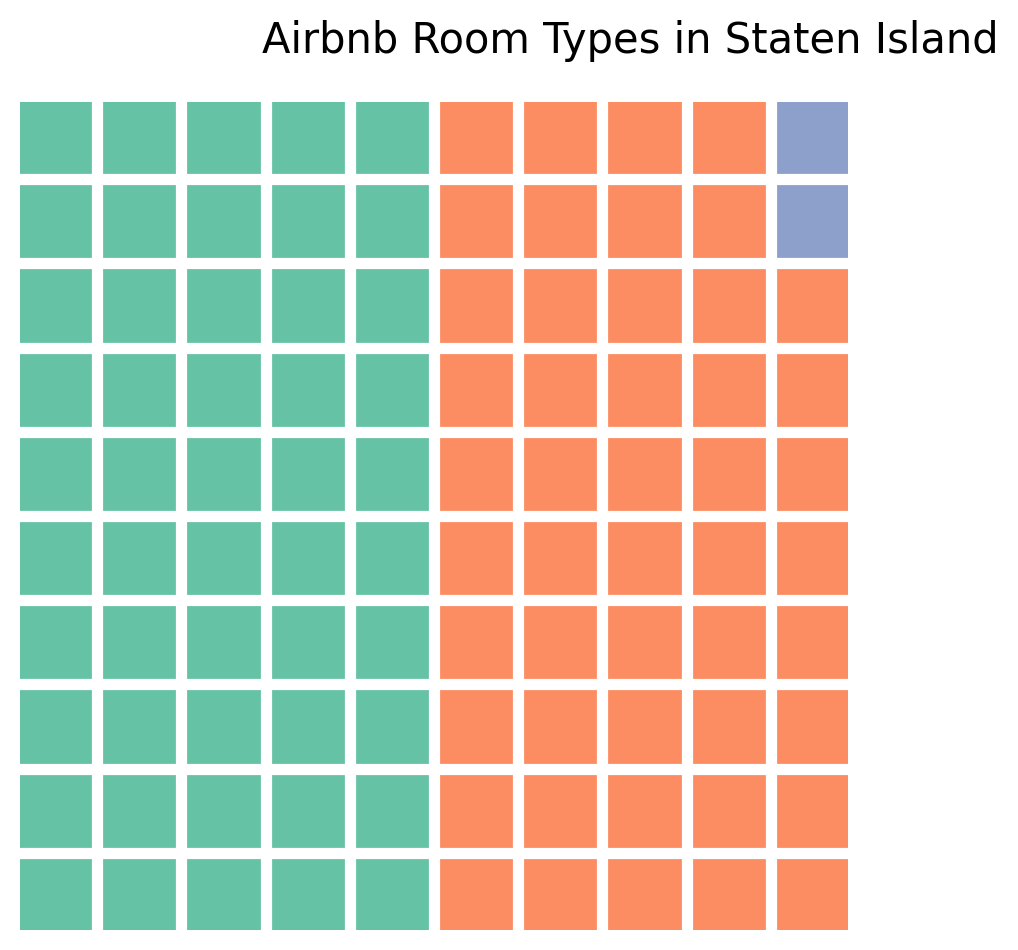

room type
Entire home/apt    58.508159
Private room       54.963680
Shared room        60.000000
Hotel room               NaN
Name: count, dtype: float64


In [27]:
from pywaffle import Waffle

#Room Type Percentages in Staten Island
df_StatenIsland = df[df['neighbourhood group'] == 'Staten Island']
room_types_statenisland = (df_StatenIsland['room type'].value_counts() / df_StatenIsland['room type'].value_counts().sum(axis=0)) * 100

#Waffle Chart Staten Island
plt.figure(FigureClass = Waffle, rows = 10, values = room_types_statenisland.values, columns=10)

plt.suptitle('Airbnb Room Types in Staten Island',fontsize=15)
plt.show()


df_StatenIsland_building_age_10 = df_StatenIsland[df_StatenIsland['Building_Age']>10]
print((df_StatenIsland_building_age_10['room type'].value_counts()/df_StatenIsland['room type'].value_counts())*100)


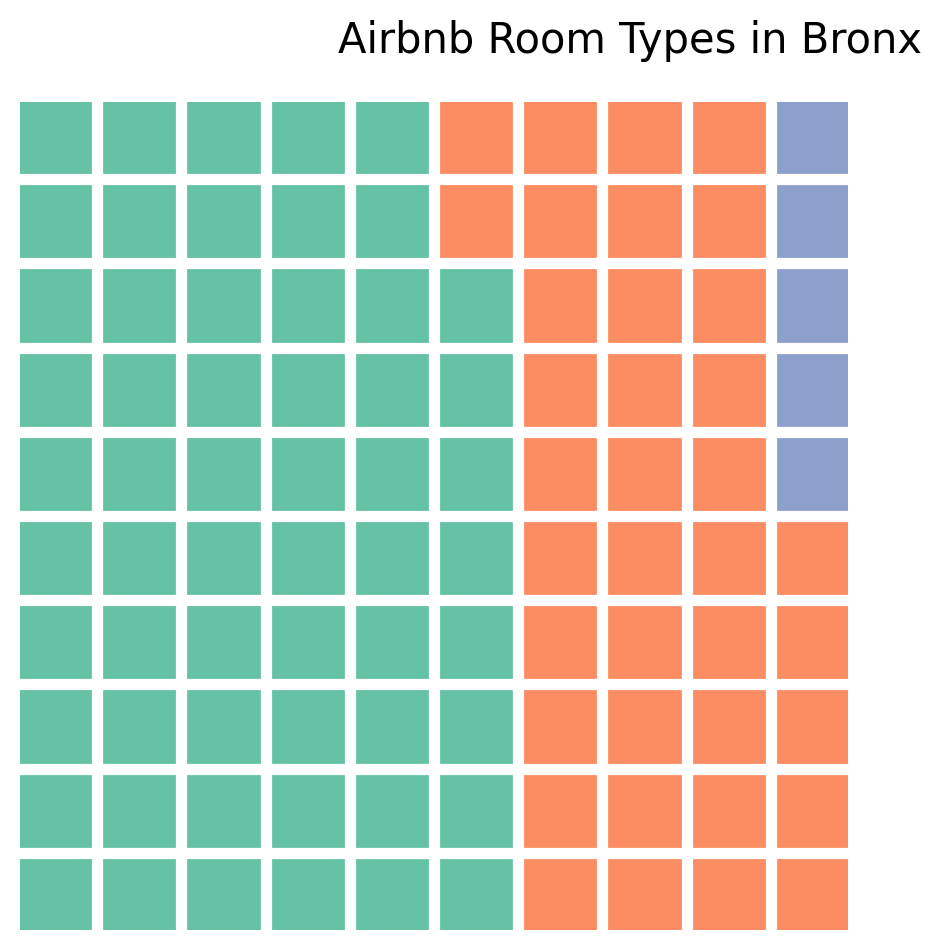

room type
Private room       49.469965
Entire home/apt    51.049724
Shared room        43.243243
Hotel room               NaN
Name: count, dtype: float64


In [28]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

#DATA
df_Bronx = df[df['neighbourhood group'] == 'Bronx']
room_types_bronx = (df_Bronx['room type'].value_counts() / df_Bronx['room type'].value_counts().sum(axis=0)) * 100
bronx_roomtypes = [58.21,37.22,4.57,0]

#Waffle Chart for Bronx
plt.figure(FigureClass = Waffle, rows = 10, values = room_types_bronx.values, columns = 10)
plt.suptitle('Airbnb Room Types in Bronx',fontsize=15)

plt.show()


df_Bronx_building_age_10 = df_Bronx[df_Bronx['Building_Age']>10]
print((df_Bronx_building_age_10['room type'].value_counts()/df_Bronx['room type'].value_counts())*100)


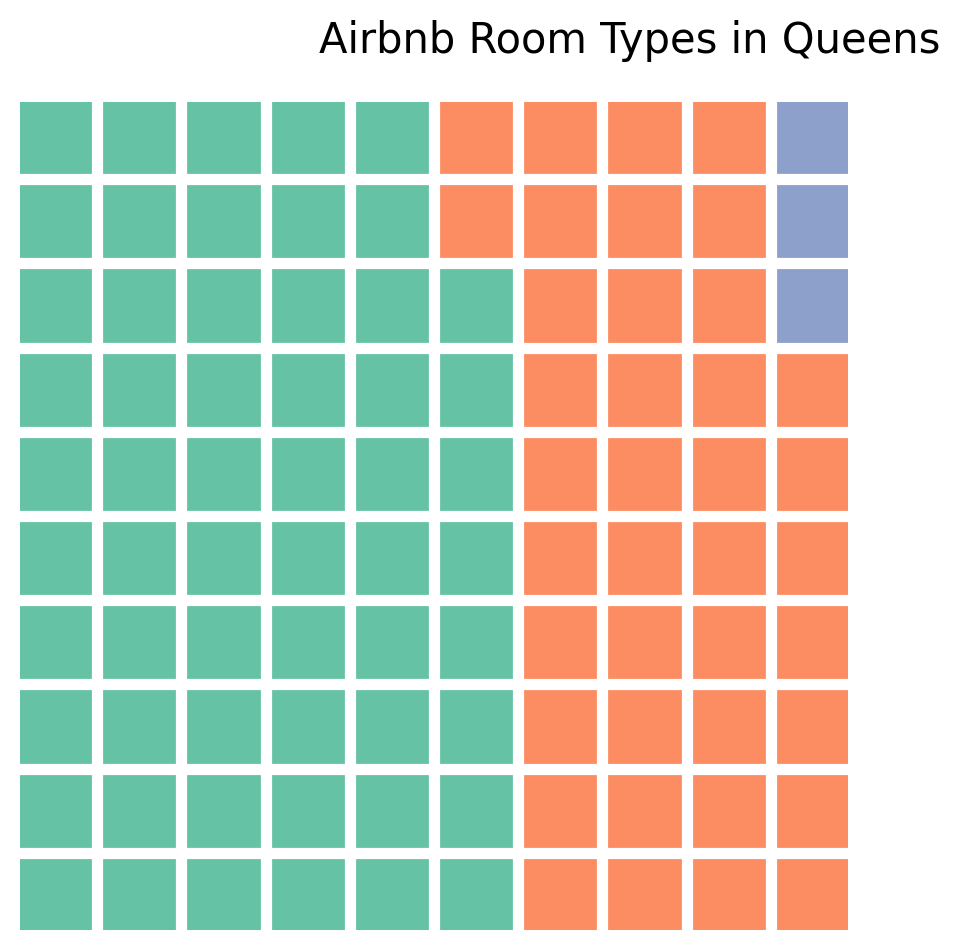

room type
Private room       51.237775
Entire home/apt    50.022676
Shared room        48.397436
Hotel room         50.000000
Name: count, dtype: float64


In [29]:
from pywaffle import Waffle

df_queens = df[df['neighbourhood group'] == 'Queens']
room_types_queens = (df_queens['room type'].value_counts() / df_queens['room type'].value_counts().sum(axis=0)) * 100

#Waffle Chart for Queens
plt.figure(FigureClass = Waffle, rows = 10, values = room_types_queens.values, columns = 10)
plt.suptitle('Airbnb Room Types in Queens',fontsize=15)

plt.show()

df_queens_building_age_10 = df_queens[df_queens['Building_Age']>10]
print((df_queens_building_age_10['room type'].value_counts()/df_queens['room type'].value_counts())*100)

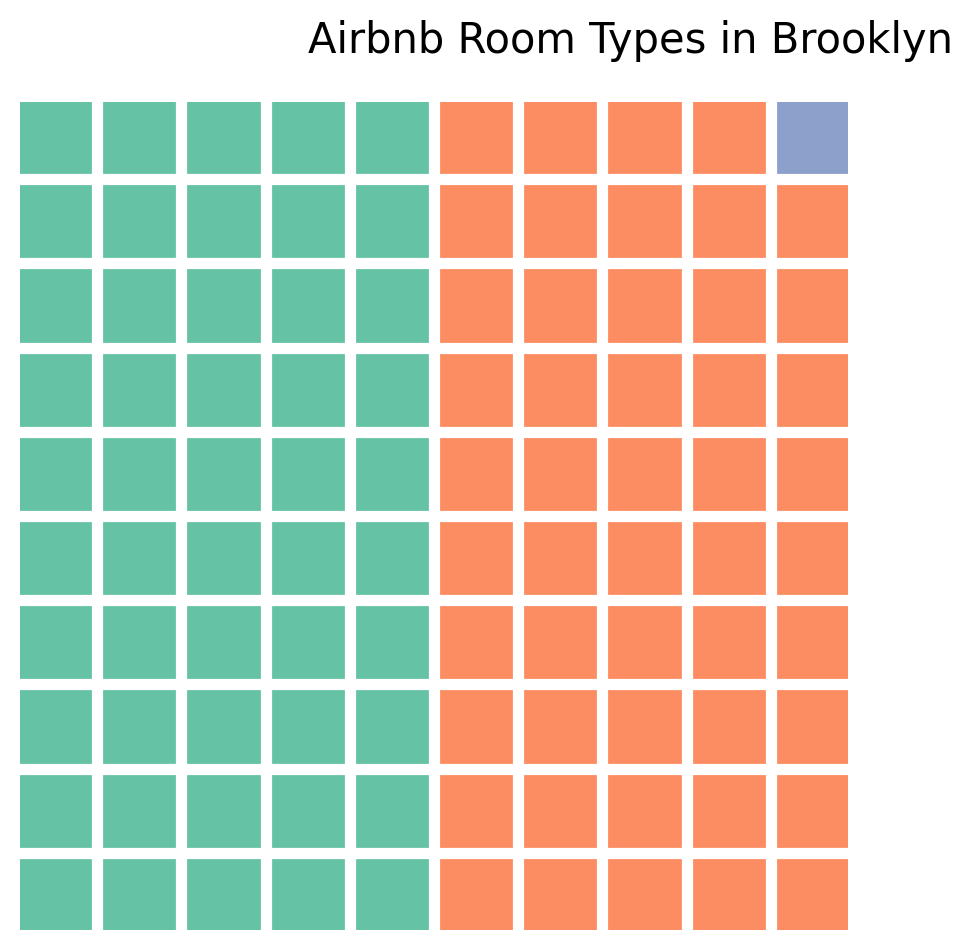

room type
Entire home/apt    50.456157
Hotel room         40.000000
Private room       49.126898
Shared room        49.684543
Name: count, dtype: float64


In [30]:
from pywaffle import Waffle

#Room Types in Brooklyn
df_brooklyn = df[df['neighbourhood group'] == 'Brooklyn']
room_types_brooklyn = (df_brooklyn['room type'].value_counts()/df_brooklyn['room type'].value_counts().sum(axis=0)) * 100

#Waffle Chart for Queens
plt.figure(FigureClass = Waffle, rows = 10,columns=10, values = room_types_brooklyn.values)
plt.suptitle('Airbnb Room Types in Brooklyn',fontsize=15)

plt.show()

df_brooklyn_building_age_10 = df_brooklyn[df_brooklyn['Building_Age']>10]
print((df_brooklyn_building_age_10['room type'].value_counts()/df_brooklyn['room type'].value_counts())*100)

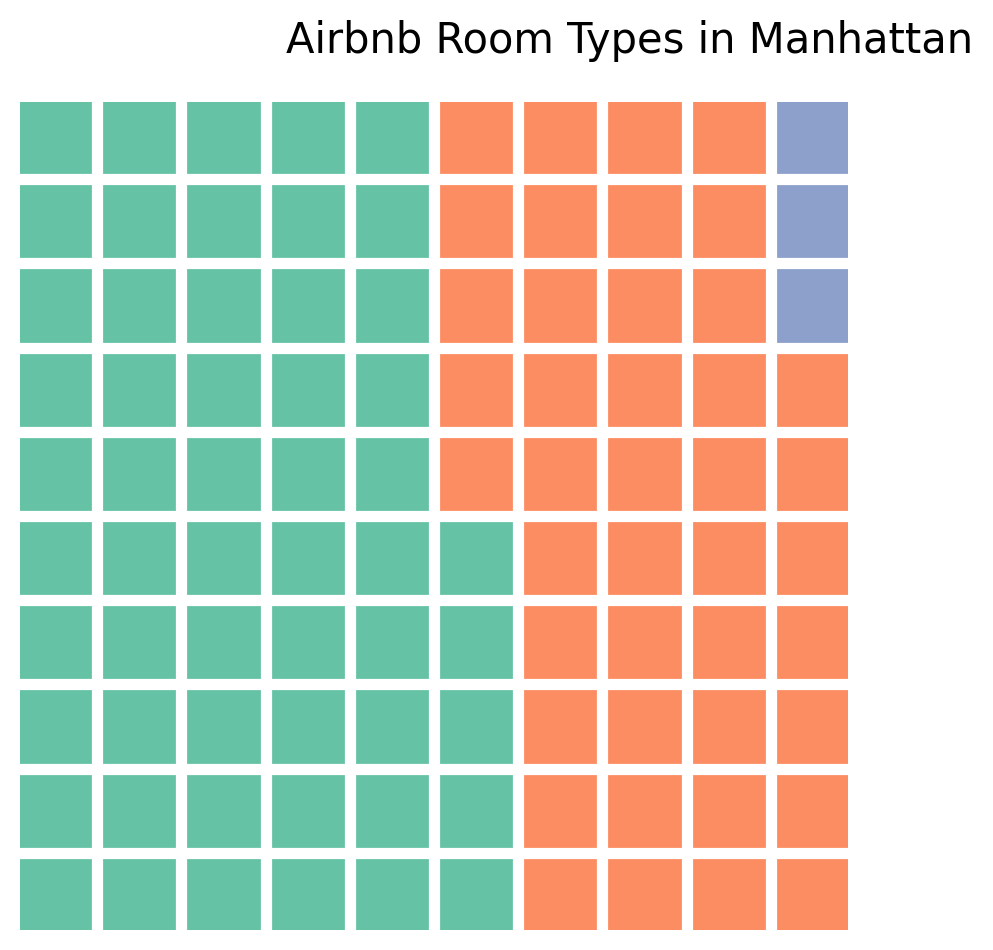

room type
Entire home/apt    49.835144
Private room       49.702928
Shared room        52.919255
Hotel room         54.545455
Name: count, dtype: float64


In [31]:
#WAFFLE for MANHATTAN

df_manhattan = df[df['neighbourhood group'] == 'Manhattan']
room_types_manhattan = (df_manhattan['room type'].value_counts() / df_manhattan['room type'].value_counts().sum(axis=0)) * 100




#instant_bookable_ratio = df_manhattan.groupby('room type')['instant_bookable'].value_counts()
#instant_bookable_ratios = [0.5, 0.56, 0.51, 0.51]  
#base_colors = ['#FF5A5F', '#00A699', '#FC642D', '#484848']

#Waffle Chart for Manhattan
plt.figure(FigureClass = Waffle, rows = 10, values = [55,42,3,0], columns=10)
plt.suptitle('Airbnb Room Types in Manhattan',fontsize=15)

plt.show()

df_manhattan_building_age_10 = df_manhattan[df_manhattan['Building_Age']>10]
print((df_manhattan_building_age_10['room type'].value_counts()/df_manhattan['room type'].value_counts())*100)



/Users/erenbardak/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


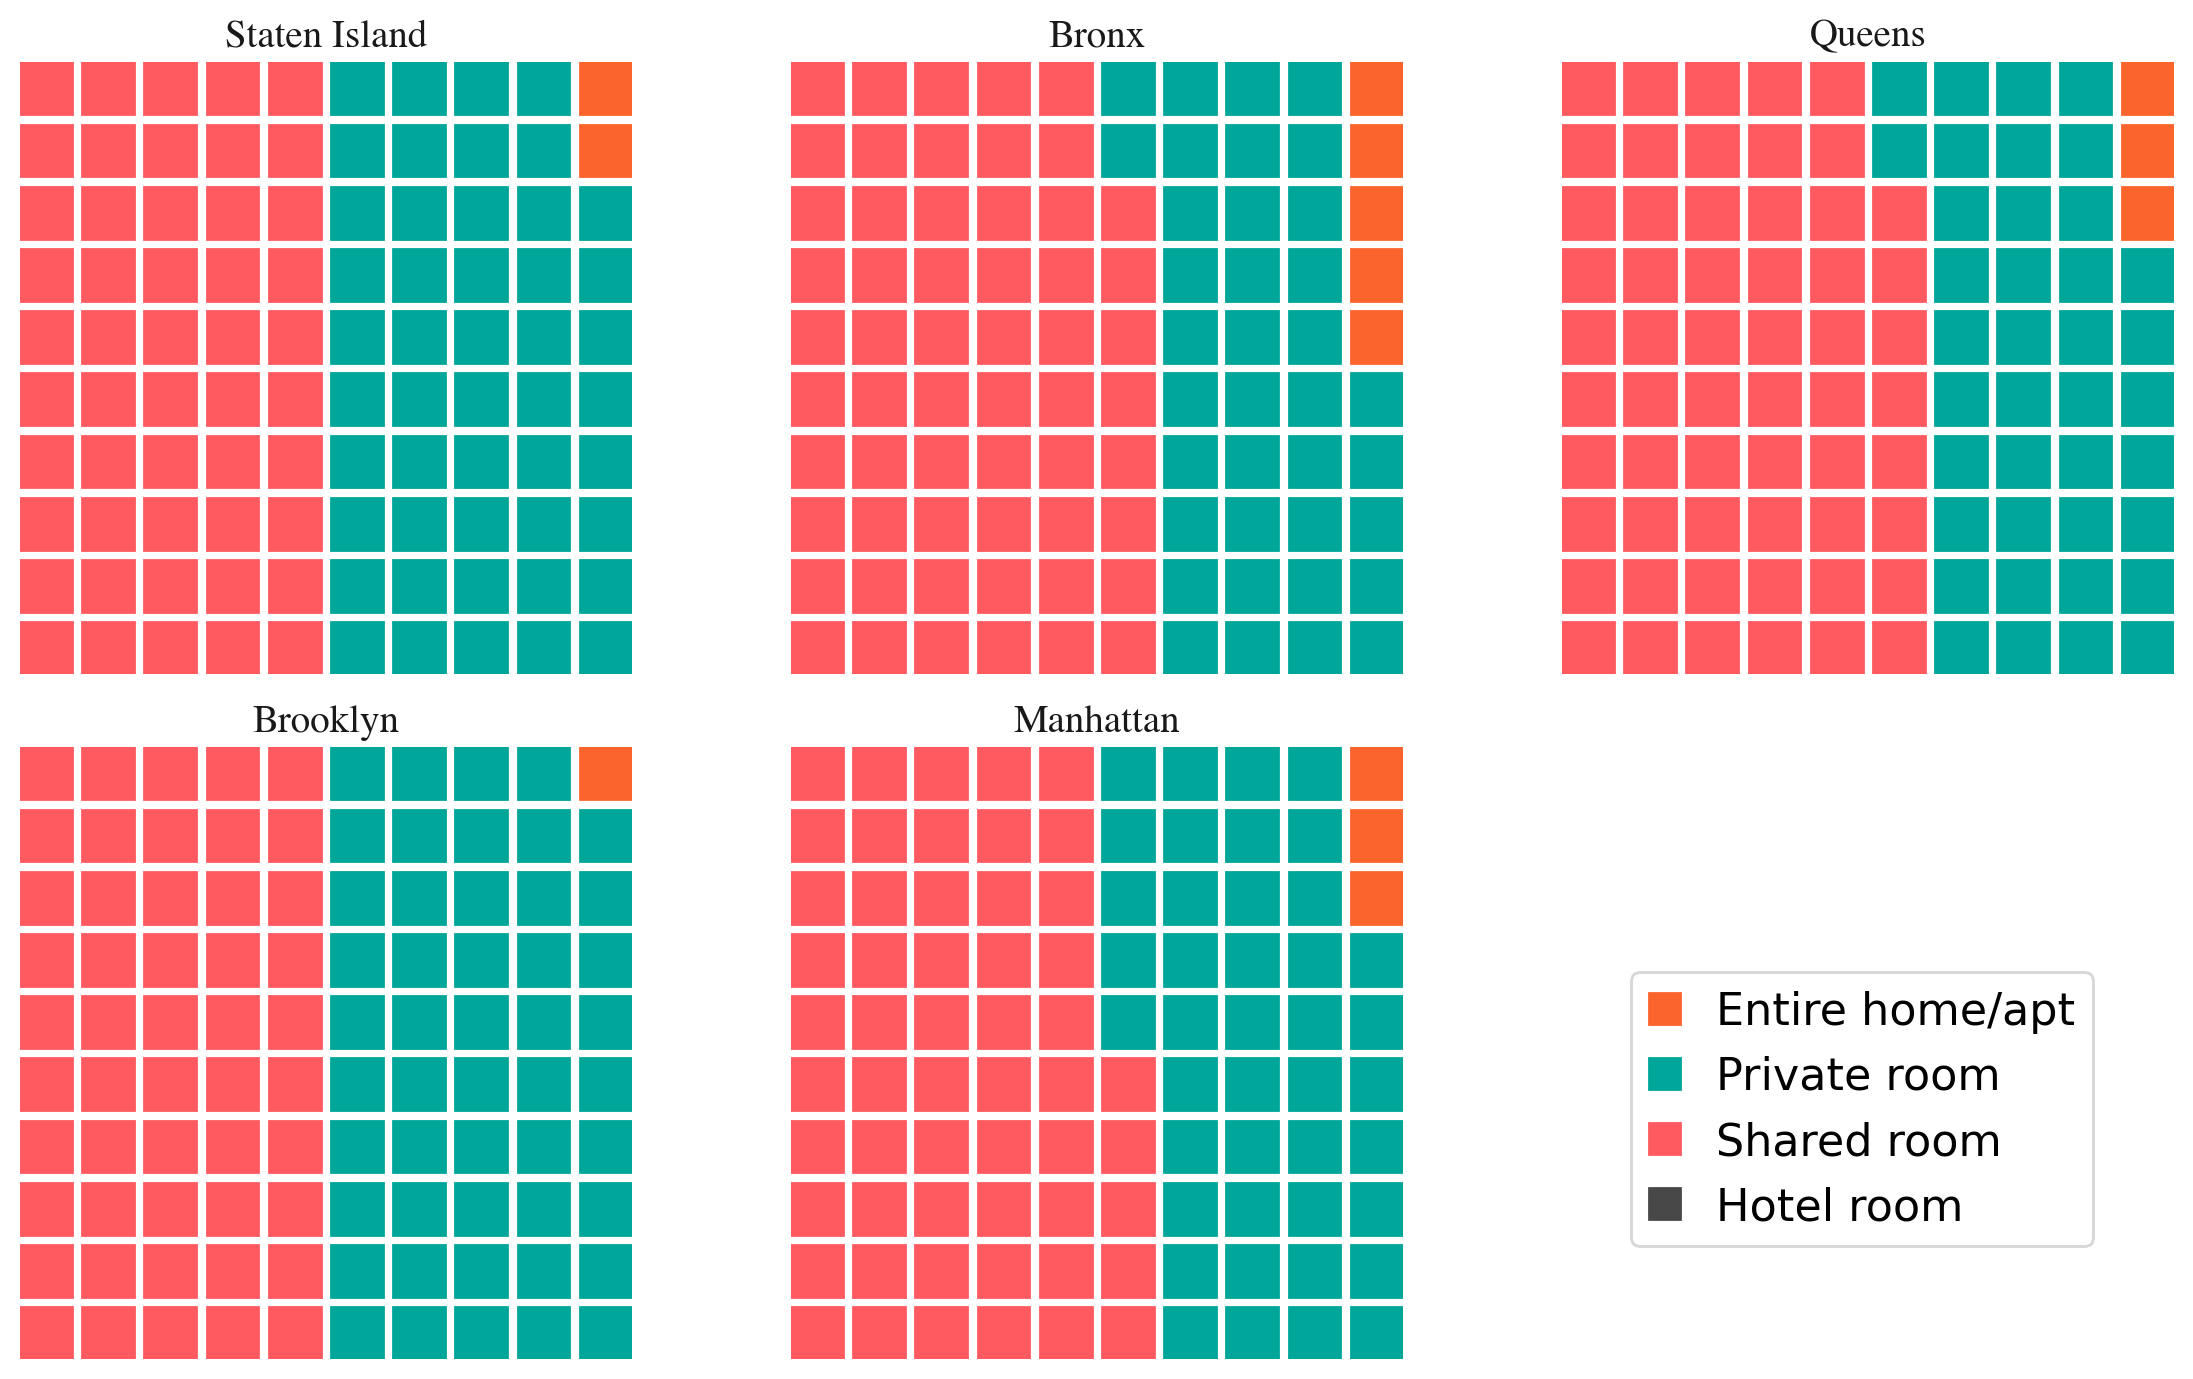

In [32]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch


fig = plt.figure(FigureClass=Waffle, 
                 plots = {231: {'values': room_types_statenisland.values,
                                'title':{'label':'Staten Island', 'fontsize':14, 'fontname':"Times", 'weight':'bold', 'alpha':0.9,'loc':'center'}, 
                               },
                               
                          232: { 
                              'values': room_types_bronx.values,
                              'title':{'label':'Bronx', 'fontsize':14, 'fontname':"Times", 'weight':'bold', 'alpha':0.9,'loc':'center'}
                          },
                          233:{ 
                              'values': room_types_queens.values,
                              'title':{'label':'Queens', 'fontsize':14, 'fontname':"Times", 'weight':'bold', 'alpha':0.9,'loc':'center'}
                          },
                          234: { 
                              'values': room_types_brooklyn.values,
                              'title':{'label':'Brooklyn', 'fontsize':14, 'fontname':"Times", 'weight':'bold', 'alpha':0.9,'loc':'center'}
                          },
                          235: { 
                              'values': [55,42,3,0],
                              'title':{'label':'Manhattan', 'fontsize':14, 'fontname':"Times", 'weight':'bold', 'alpha':0.9,'loc':'center'}
                          }
                         },      
                 figsize=(12,7),                 
                 rows=10, 
                 columns = 10, 
                 colors=['#FF5A5F','#00A699', '#FC642D',  '#484848']
                 )
patches = [mpatches.Patch(color=color, label=label) for label, color in zip(room_types_statenisland.index, ['#FC642D','#00A699', '#FF5A5F',  '#484848'])]

legend_ax = fig.add_axes([0.75, 0.15, 0.1, 0.1])
legend_ax.axis('off')

# add legend to the new axis
legend = legend_ax.legend(handles=patches,loc='center',bbox_to_anchor=(0.3, 0.5),fontsize=16,handlelength=0.7)

                

plt.show()

In [33]:
df_numeric = df.select_dtypes(include=[np.number])
# print correlation matrix for numeric columns
print(df_numeric.corr())

                                     lat      long     price  service fee  \
lat                             1.000000  0.083531 -0.005514    -0.005514   
long                            0.083531  1.000000  0.000077     0.000077   
price                          -0.005514  0.000077  1.000000     1.000000   
service fee                    -0.005514  0.000077  1.000000     1.000000   
minimum nights                 -0.002322 -0.082973  0.001371     0.001371   
number of reviews              -0.016767  0.064206  0.004715     0.004715   
reviews per month              -0.007414  0.113947  0.003352     0.003352   
review rate number             -0.002529  0.015390 -0.005005    -0.005005   
calculated host listings count -0.012550 -0.087856 -0.001800    -0.001800   
availability 365               -0.028835  0.110970 -0.000470    -0.000470   
Building_Age                   -0.008524 -0.001958  0.004410     0.004410   
Occupancy                       0.020423 -0.006922  0.006490     0.006490   

In [34]:
#LOLIPOP CHARTS

In [35]:
df.groupby('neighbourhood group')['neighbourhood'].nunique()

neighbourhood group
Bronx            48
Brooklyn         48
Manhattan        32
Queens           52
Staten Island    44
Name: neighbourhood, dtype: int64

In [36]:
#FILTERING THE BUILDING AGE, MINIMUM NIGHTS, LAST REVIEW
df_removed = df[(df['Building_Age'] <= 10) & (df['last review'].dt.year >= 2020) & (df['minimum nights'] <= 15)]

df_removed.info()
# Calculate and print the quantiles

<class 'pandas.core.frame.DataFrame'>
Index: 6509 entries, 0 to 69309
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              6509 non-null   category      
 1   NAME                            6499 non-null   object        
 2   host_identity_verified          6496 non-null   category      
 3   neighbourhood group             6509 non-null   category      
 4   neighbourhood                   6509 non-null   category      
 5   lat                             6509 non-null   float64       
 6   long                            6509 non-null   float64       
 7   instant_bookable                6504 non-null   category      
 8   cancellation_policy             6505 non-null   category      
 9   room type                       6509 non-null   category      
 10  Construction year               6509 non-null   category      
 11  price   

In [37]:
manhattan = df[df['neighbourhood group'] == 'Manhattan']
mean = manhattan['review rate number'].mean()
print(mean)
print(manhattan.groupby('neighbourhood')['review rate number'].mean().sort_values())

3.2703686031253727
neighbourhood
Tribeca              3.079167
Little Italy         3.093264
Chinatown            3.166410
Inwood               3.179872
Battery Park City    3.182927
                       ...   
Windsor Terrace           NaN
Woodhaven                 NaN
Woodlawn                  NaN
Woodrow                   NaN
Woodside                  NaN
Name: review rate number, Length: 224, dtype: float64


In [38]:
manhattan_removed = df_removed[df_removed['neighbourhood group'] == 'Manhattan']
mean_removed = manhattan_removed['review rate number'].mean()

manhattan_removed = df_removed[df_removed['neighbourhood group'] == 'Manhattan']

print(mean_removed)
print(manhattan_removed.groupby('neighbourhood')['review rate number'].mean().sort_values())

3.4902416356877324
neighbourhood
Marble Hill          2.000000
Battery Park City    2.500000
Roosevelt Island     2.666667
Gramercy             2.962963
Two Bridges          3.000000
                       ...   
Windsor Terrace           NaN
Woodhaven                 NaN
Woodlawn                  NaN
Woodrow                   NaN
Woodside                  NaN
Name: review rate number, Length: 224, dtype: float64


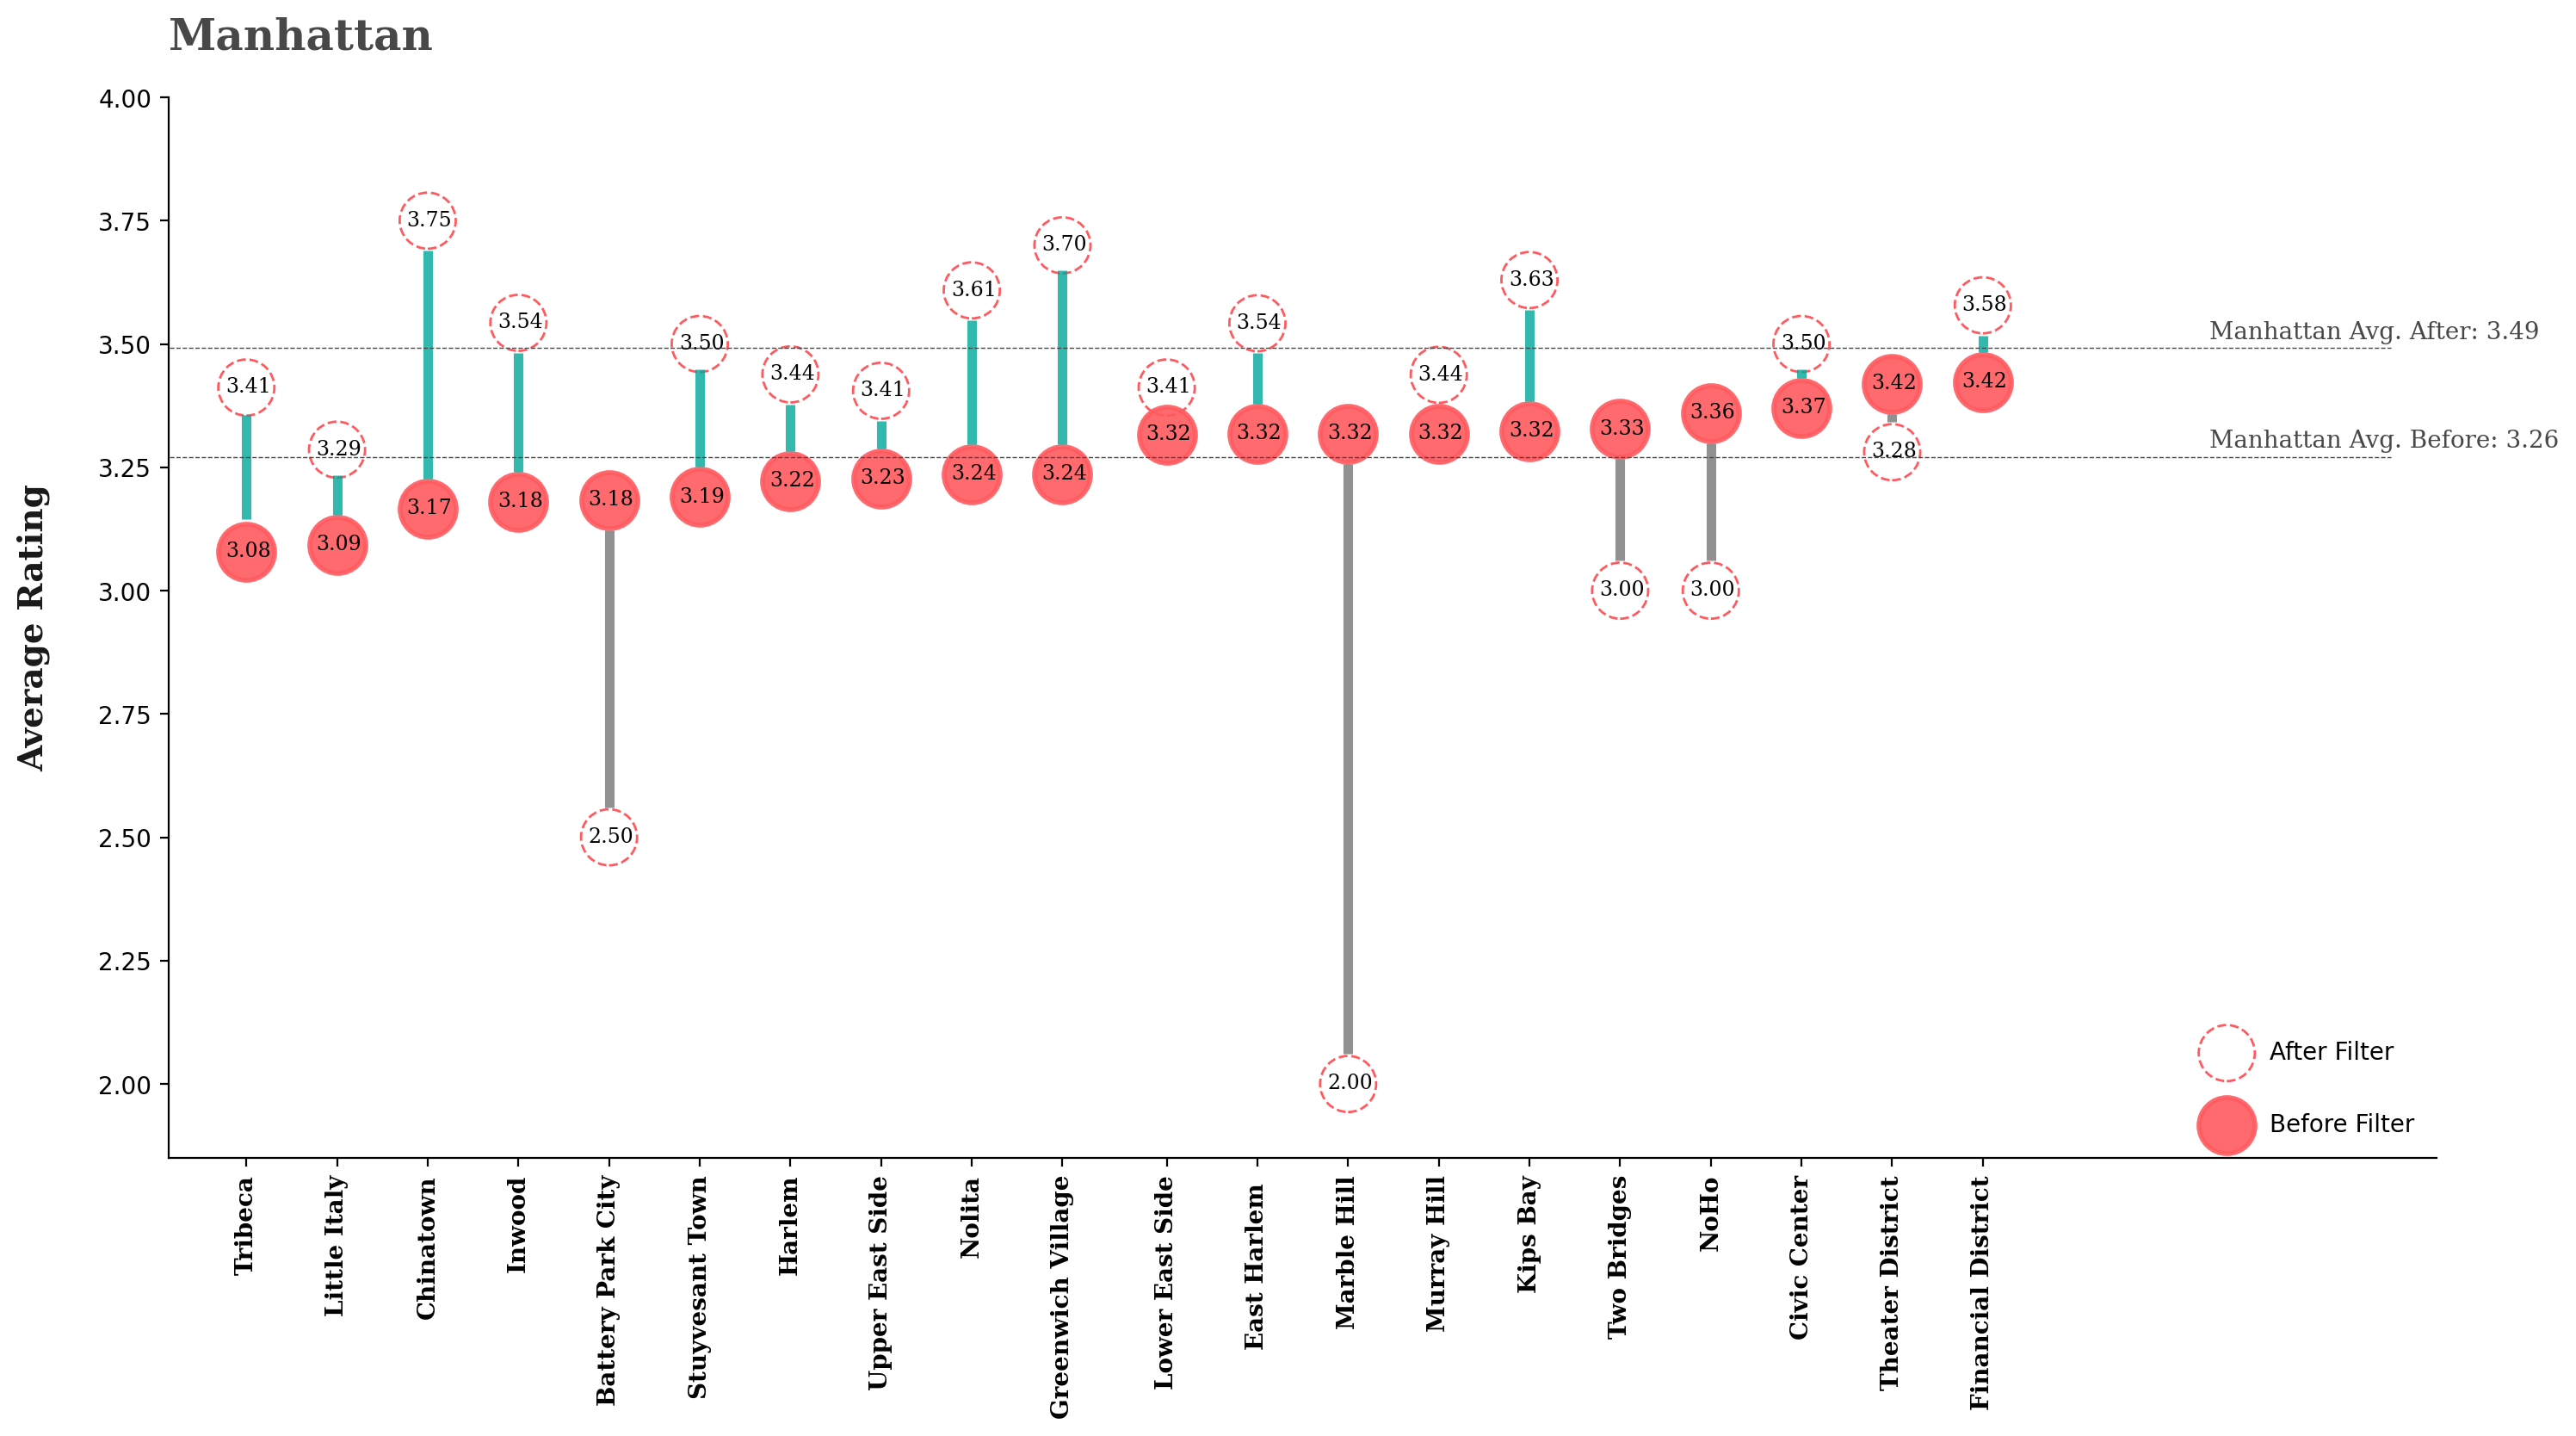

In [39]:
#Manhattan Latest
%config InlineBackend.figure_format = 'retina'

manhattan = df[df['neighbourhood group'] == 'Manhattan']
mean = manhattan['review rate number'].mean()


# mean = 3.2635828185605518
fig, ax = plt.subplots(figsize=(17,8))

#ax = fig.add_subplot(111, facecolor='#F7F7F7')

#Limits
ax.set_xlim(-0.01,25)
ax.set_ylim(1.85,4)

#Chart

#Top10 - After Removal
# Lower East Side               3.411765
# East Harlem                   3.542056
# Marble Hill                   2.000000
# Murray Hill                   3.437500
# Kips Bay                      3.629630
# Two Bridges                   3.000000
# NoHo                          3.000000
# Civic Center                  3.500000
# Theater District              3.280702
# Financial District            3.578431

#Top10

# Lower East Side               3.316778
# East Harlem                   3.317805
# Marble Hill                   3.318182
# Murray Hill                   3.318182
# Kips Bay                      3.323777
# Two Bridges                   3.327434
# NoHo                          3.359649
# Civic Center                  3.370787
# Theater District              3.419098
# Financial District            3.422535
top10_x = [11,12,13,14,15,16,17,18,19,20]
top10_y = [3.316778,3.317805,3.318182,3.318182,3.323777,3.327434,3.359649,3.370787,3.419098,3.422535]
top10_names = ['Lower East Side','East Harlem ', 'Marble Hill', 'Murray Hill', 'Kips Bay','Two Bridges','NoHo','Civic Center','Theater District','Financial District']


#Bottom 10 - After Removal
# Tribeca                       3.411765
# Little Italy                  3.285714
# Chinatown                     3.750000
# Inwood                        3.542857
# Battery Park City             2.500000
# Stuyvesant Town               3.500000
# Harlem                        3.438356
# Upper East Side               3.405172
# Nolita                        3.608696
# Greenwich Village             3.700000

#Bottom10
# Tribeca                       3.079167
# Little Italy                  3.093264
# Chinatown                     3.166410
# Inwood                        3.179872
# Battery Park City             3.182927
# Stuyvesant Town               3.189655
# Harlem                        3.222520
# Upper East Side               3.227057
# Nolita                        3.235426
# Greenwich Village             3.235897

bottom10_x = [0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85]
bottom10_y = [3.079167,3.093264,3.166410,3.179872,3.182927,3.189655,3.222520,3.227057,3.235426,3.235897]
bottom10_names = ['Tribeca','Little Italy','Chinatown','Inwood','Battery Park City','Stuyvesant Town','Harlem','Upper East Side','Nolita','Greenwich Village']



#SCATTERS
x_line = [0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85,11,12,13,14,15,16,17,18,19,20]
y_filtered = [3.411765, 3.285714, 3.750000,3.542857, 2.500000,3.500000, 3.438356, 3.405172,3.608696,3.700000,3.411765,3.542056,2.000000,3.437500,3.629630,3.000000,3.000000,3.500000,3.280702,3.578431]
y_not_filtered = [3.079167,3.093264,3.166410,3.179872,3.182927,3.189655,3.222520,3.227057,3.235426,3.235897, 3.316778,3.317805,3.318182,3.318182,3.323777,3.327434,3.359649,3.370787,3.419098,3.422535]

ax.scatter(x_line,y_filtered,marker = "o", c='white',s=550, edgecolors='#FF5A5F', linewidths=1, linestyle='dashed',label='After Filter')
ax.scatter(x_line,y_not_filtered,marker = "o", c='#FF5A5F',s=550, edgecolors='#FF5A5F', linewidths=2,label='Before Filter',alpha=0.9)

#LEGENDS

#LINES
ax.vlines(x=[0.85,1.85,2.85,3.85,5.85,6.85,7.85,8.85,9.85,12,14,15,18,20],ymin=np.array([3.120167,3.129264,3.202410,3.215872,3.225655,3.258520,3.263057,3.271426,3.271897,3.353805,3.354182,3.359777,3.406787,3.458535])+0.025,ymax=np.array([3.380765, 3.259714, 3.714000,3.506857,3.474000, 3.402356, 3.369172,3.572696,3.674000,3.506056,3.403500,3.593630,3.474000,3.542431])-0.025,color='#00A699', alpha=0.8, linewidth=4)
ax.vlines(x=[4.85,13,16,17,19],ymin=np.array([2.536000,2.036000,3.036000,3.036000,3.316702])+0.025,ymax=np.array([3.146927,3.282182,3.291434,3.323649,3.383098])-0.025,color='#767676', alpha=0.8, linewidth=4)

#Horizontal Line - Average
ax.hlines(y=mean,xmin=0, xmax=24.5, color='#484848', linestyles='dashed', lw=0.5)

ax.hlines(3.4914232730644414,xmin=0, xmax=24.5, color='#484848', linestyles='dashed', lw=0.5)
#ax.text(mean,0.4,f'{mean:04.2f}',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)


#TEXTS
str_list_filtered = [f'{round(i, 2):.2f}' for i in y_filtered]
for x,y,point in zip(x_line, y_filtered, str_list_filtered):
    ax.text(x-0.23,y-0.01,point,fontsize=8.5, fontname="Serif")

str_list_not_filtered = [f'{round(i, 2):.2f}' for i in y_not_filtered]
for x,y,point in zip(x_line, y_not_filtered, str_list_not_filtered):
    ax.text(x-0.23,y-0.01,point,fontsize=8.5, fontname="Serif", color='black')


ax.text(22.5,mean+0.02,'Manhattan Avg. Before: 3.26',c='#484848',fontsize=10, fontname="Serif")
ax.text(22.5,3.51,'Manhattan Avg. After: 3.49',c='#484848',fontsize=10, fontname="Serif")

#Added ymins to 0.36, except 11
#Subtracted ymaxs to 0.36, except 11



ax.set_ylabel('Average Rating',fontsize=14, fontname="Serif", weight='bold', alpha=0.9, labelpad=20)
#ticks
#ax.set_xlabel('Average Rating',fontsize=12, fontname="Times", weight='bold', alpha=0.9)

ax.set_xticks([])
#ax.set_yticks([])

#Make the spins invisible
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

#total_name_list = ['Tribeca','Little Italy','Chinatown','Inwood','Battery Park City','Stuyvesant Town','Harlem','Upper East Side','Nolita','Greenwich Village','Lower East Side','East Harlem ', 'Marble Hill', 'Murray Hill', 'Kips Bay','Two Bridges','NoHo','Civic Center','Theater District','Financial District']

# for i in range(len(x_line)):
#     ax.text(x_line[i]-0.4,3.40,total_name_list[i],c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9,rotation='vertical')

ax.set_xticks([0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85,11,12,13,14,15,16,17,18,19,20])
ax.set_xticklabels(['Tribeca','Little Italy','Chinatown','Inwood','Battery Park City','Stuyvesant Town','Harlem','Upper East Side','Nolita','Greenwich Village','Lower East Side','East Harlem ', 'Marble Hill', 'Murray Hill', 'Kips Bay','Two Bridges','NoHo','Civic Center','Theater District','Financial District'],rotation='vertical',fontname="Serif",weight='bold' )


space = 2
plt.legend(labelspacing=space,loc='lower right', frameon= False)



#plt.legend(loc='lower right')
plt.title('Manhattan',loc='left', c='#484848',fontname="Serif",weight='bold',fontsize=18, pad=20)
plt.show()



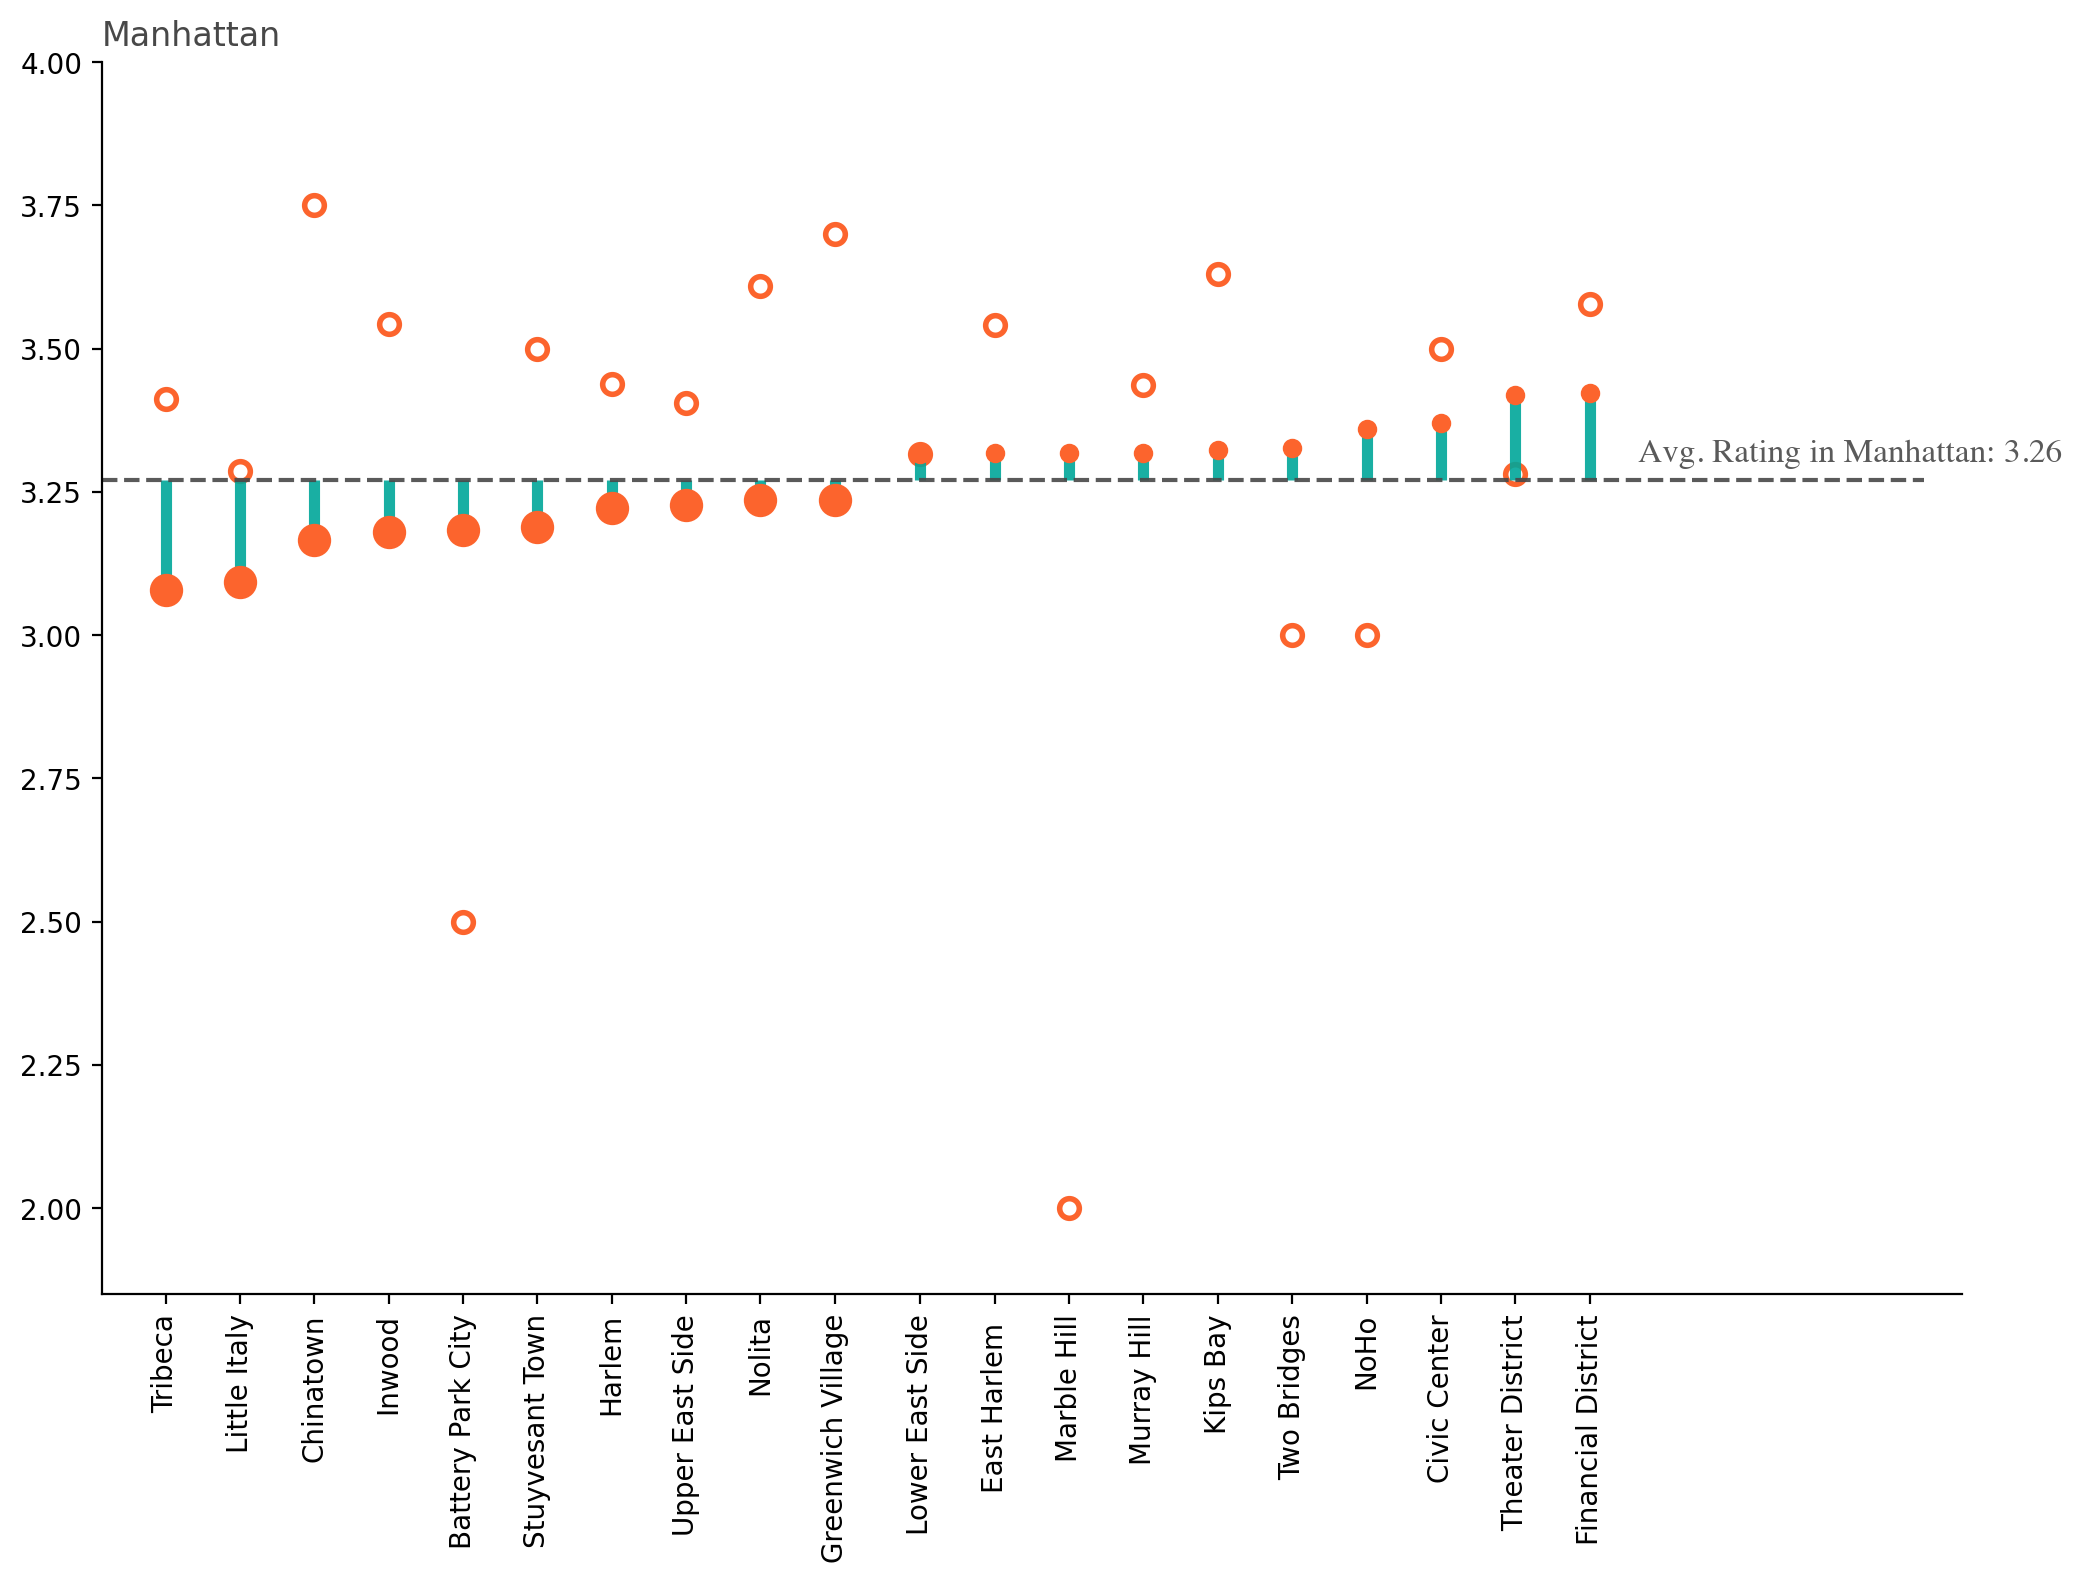

In [40]:
#MANHATTAN NEW


manhattan = df[df['neighbourhood group'] == 'Manhattan']
mean = manhattan['review rate number'].mean()


# mean = 3.2635828185605518
fig, ax = plt.subplots(figsize=(12,8))

#Limits
ax.set_xlim(-0.01,25)
ax.set_ylim(1.85,4)

#Chart



#Top10 - After Removal

# Lower East Side               3.316778
# East Harlem                   3.542056
# Marble Hill                   2.000000
# Murray Hill                   3.437500
# Kips Bay                      3.629630
# Two Bridges                   3.000000
# NoHo                          3.000000
# Civic Center                  3.500000
# Theater District              3.280702
# Financial District            3.578431

#Top10

# Lower East Side               3.316778
# East Harlem                   3.317805
# Marble Hill                   3.318182
# Murray Hill                   3.318182
# Kips Bay                      3.323777
# Two Bridges                   3.327434
# NoHo                          3.359649
# Civic Center                  3.370787
# Theater District              3.419098
# Financial District            3.422535


top10_x = [11,12,13,14,15,16,17,18,19,20]

top10_y = [3.316778,3.317805,3.318182,3.318182,3.323777,3.327434,3.359649,3.370787,3.419098,3.422535]

top10_names = ['Lower East Side','East Harlem ', 'Marble Hill', 'Murray Hill', 'Kips Bay','Two Bridges','NoHo','Civic Center','Theater District','Financial District']

#STICKS
ax.vlines(x = top10_x, ymin=mean, ymax=top10_y, color='#00A699', alpha=0.9, linewidth=4)

#Candies
ax.plot( top10_x,top10_y, marker = "o", linewidth = 0, c='#FC642D')



#TEXTS For Top 5


# ax.text(6.5,mean-0.05,'Spuyten Duyvil',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
# ax.text(6,3.77,'3.67',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

# ax.text(7.5,mean-0.05,'City Island',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
# ax.text(7,3.79,'3.69',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

# ax.text(8.5,mean-0.05,'Mount Eden',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
# ax.text(8,3.80,'3.70',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

# ax.text(9.5,mean-0.05,'West Farms',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
# ax.text(9,4.10,'4.00',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

# ax.text(10.5,mean-0.05,'Co-op City',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
# ax.text(10,4.50,'4.40',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)




#Bottom 10 - After Removal

# Tribeca                       3.411765
# Little Italy                  3.285714
# Chinatown                     3.750000
# Inwood                        3.542857
# Battery Park City             2.500000
# Stuyvesant Town               3.500000
# Harlem                        3.438356
# Upper East Side               3.405172
# Nolita                        3.608696
# Greenwich Village             3.700000



#Bottom10
# Tribeca                       3.079167
# Little Italy                  3.093264
# Chinatown                     3.166410
# Inwood                        3.179872
# Battery Park City             3.182927
# Stuyvesant Town               3.189655
# Harlem                        3.222520
# Upper East Side               3.227057
# Nolita                        3.235426
# Greenwich Village             3.235897


bottom10_x = [0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85]
bottom10_y = [3.079167,3.093264,3.166410,3.179872,3.182927,3.189655,3.222520,3.227057,3.235426,3.235897]

bottom10_names = ['Tribeca','Little Italy','Chinatown','Inwood','Battery Park City','Stuyvesant Town','Harlem','Upper East Side','Nolita','Greenwich Village']

#STICKS
ax.vlines(x=bottom10_x , ymin=mean, ymax=bottom10_y, color='#00A699', alpha=0.9, linewidth=4)

#Candies
ax.plot(bottom10_x,bottom10_y, marker = "o", linewidth = 0, c='#FC642D',markersize=11)


#TEXTS For Bottom 5
# ax.text(0.45,mean+0.05, 'Hunts Point',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
# ax.text(0.85, 2.71,'2.81',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

# ax.text(1.45,mean+0.05, 'Highbridge',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
# ax.text(1.85,2.98,'3.08',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
# ax.text(2.45,mean+0.05, 'Castle Hill',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
# ax.text(2.85,3.00,'3.10',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
# ax.text(3.45,mean+0.05,'Concourse',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
# ax.text(3.85,3.00,'3.10',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
# ax.text(4.45,mean+0.05,'Olinville',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
# ax.text(4.85,3.00,'3.10',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)


#Horizontal Line - Average
ax.hlines(y=mean,xmin=0, xmax=24.5, color='#484848', linestyles='dashed', lw=1.5, alpha=0.9)
#ax.text(mean,0.4,f'{mean:04.2f}',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)
ax.text(23.5,mean+0.02,'Avg. Rating in Manhattan: 3.26',c='#484848', horizontalalignment='center',verticalalignment='bottom',fontsize=12, fontname="Times", weight='bold', alpha=0.9)


##SCATTER CHART

x_line = [0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85,11,12,13,14,15,16,17,18,19,20]
y_filtered = [3.411765, 3.285714, 3.750000,3.542857, 2.500000,3.500000, 3.438356, 3.405172,3.608696,3.700000,3.316778,3.542056,2.000000,3.437500,3.629630,3.000000,3.000000,3.500000,3.280702,3.578431]
y_not_filtered = [3.079167,3.093264,3.166410,3.179872,3.182927,3.189655,3.222520,3.227057,3.235426,3.235897, 3.316778,3.317805,3.318182,3.318182,3.323777,3.327434,3.359649,3.370787,3.419098,3.422535]

ax.scatter(x_line,y_filtered,marker = "o", c='white',s=50, edgecolors='#FC642D', linewidths=2)



#ax.set_ylabel('Average Rating',fontsize=12, fontname="Times", weight='bold', alpha=0.9)
#ticks

#ax.set_xlabel('Average Rating',fontsize=12, fontname="Times", weight='bold', alpha=0.9)

ax.set_xticks([])
#ax.set_yticks([])

#Make the spins invisible
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

#total_name_list = ['Tribeca','Little Italy','Chinatown','Inwood','Battery Park City','Stuyvesant Town','Harlem','Upper East Side','Nolita','Greenwich Village','Lower East Side','East Harlem ', 'Marble Hill', 'Murray Hill', 'Kips Bay','Two Bridges','NoHo','Civic Center','Theater District','Financial District']

# for i in range(len(x_line)):
#     ax.text(x_line[i]-0.4,3.40,total_name_list[i],c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9,rotation='vertical')

ax.set_xticks([0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85,11,12,13,14,15,16,17,18,19,20])
ax.set_xticklabels(['Tribeca','Little Italy','Chinatown','Inwood','Battery Park City','Stuyvesant Town','Harlem','Upper East Side','Nolita','Greenwich Village','Lower East Side','East Harlem ', 'Marble Hill', 'Murray Hill', 'Kips Bay','Two Bridges','NoHo','Civic Center','Theater District','Financial District'],rotation='vertical' )

plt.title('Manhattan',loc='left', c='#484848')
plt.show()



In [41]:
pd.set_option('display.max_rows', None)
print(bronx.groupby('neighbourhood')['review rate number'].mean().sort_values())

NameError: name 'bronx' is not defined

In [ ]:
bronx_removed = df_removed[df_removed['neighbourhood group'] == 'Bronx']
mean_removed = bronx_removed['review rate number'].mean()

bronx_removed = df_removed[df_removed['neighbourhood group'] == 'Bronx']

print(mean_removed)
print(bronx_removed.groupby('neighbourhood')['review rate number'].mean().sort_values())

3.4828571428571427
neighbourhood
Woodlawn                      2.000000
Castle Hill                   2.000000
Tremont                       2.600000
Highbridge                    2.666667
Olinville                     2.888889
West Farms                    3.000000
Morrisania                    3.000000
Concourse                     3.062500
Williamsbridge                3.153846
Port Morris                   3.157895
Belmont                       3.166667
Claremont Village             3.166667
Edenwald                      3.166667
Longwood                      3.285714
Schuylerville                 3.300000
Throgs Neck                   3.333333
University Heights            3.400000
Baychester                    3.428571
Wakefield                     3.428571
Mott Haven                    3.450000
Concourse Village             3.454545
Kingsbridge                   3.454545
Parkchester                   3.466667
East Morrisania               3.500000
Allerton                      3

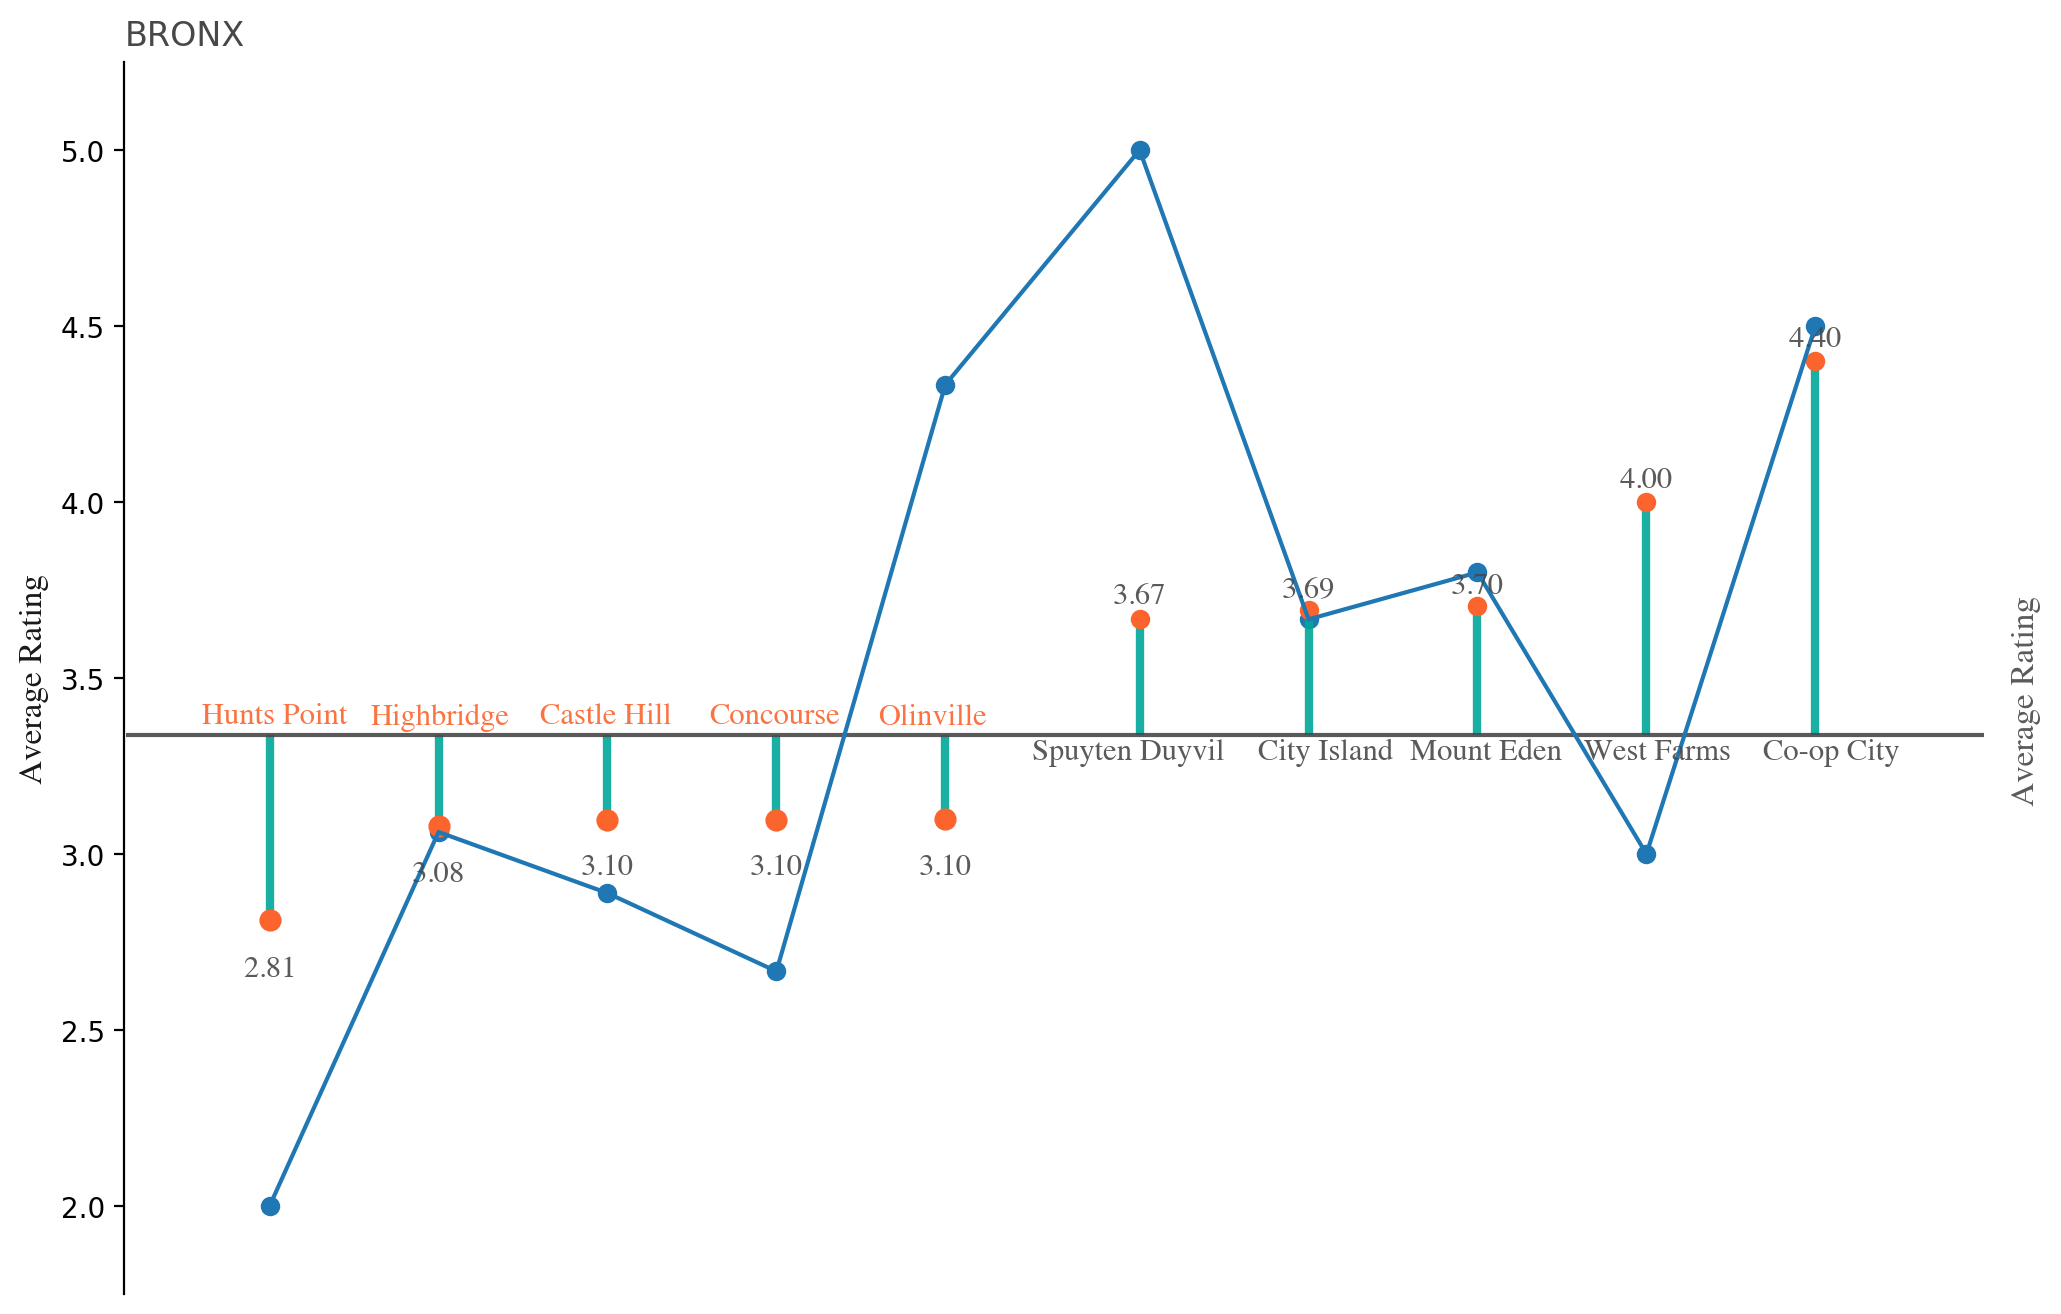

In [ ]:
#Bronx

bronx = df[df['neighbourhood group'] == 'Bronx']
mean = bronx['review rate number'].mean()


# mean = 3.339366515837104
fig, ax = plt.subplots(figsize=(12,8))

#Limits
ax.set_xlim(-0.01,11)
ax.set_ylim(1.75,5.25)

#Chart



#Top5 - After Removal

# Spuyten Duyvil                5.000000
# City Island                   3.666667
# Mount Eden                    3.800000
# West Farms                    3.000000
# Co-op City                    4.500000

#Top5
#Spuyten Duyvil                 3.666667
#City Island                    3.694444
# Mount Eden                    3.705882
# West Farms                    4.000000
# Co-op City                    4.400000

top5_x = [6,7,8,9,10]
top5_y = [3.666667,3.694444,3.705882,4.000000,4.400000]
top5_names = ['Spuyten Duyvil','City Island', 'Mount Eden', 'West Farms', 'Co-op City']

#STICKS
ax.vlines(x = top5_x, ymin=mean, ymax=top5_y, color='#00A699', alpha=0.9, linewidth=3)

#Candies
ax.plot( top5_x,top5_y, marker = "o", linewidth = 0, c='#FC642D')



#TEXTS For Top 5
ax.text(6.5,mean-0.05,'Spuyten Duyvil',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(6,3.77,'3.67',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(7.5,mean-0.05,'City Island',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(7,3.79,'3.69',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(8.5,mean-0.05,'Mount Eden',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(8,3.80,'3.70',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(9.5,mean-0.05,'West Farms',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(9,4.10,'4.00',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(10.5,mean-0.05,'Co-op City',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(10,4.50,'4.40',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)




#Bottom5
#Castle Hill                   2.812500
#Concourse                     3.078261
#Olinville                     3.095238
#Highbridge                    3.095238
#Hunts Point                   3.100000

#Bottom 5 - After Removal
#Bottom5
#Castle Hill                   2.000000
#Concourse                     3.062500
#Olinville                     2.888889
#Highbridge                    2.666667
#Hunts Point                   4.333333


bottom5_x = [0.85,1.85,2.85,3.85,4.85]
bottom5_y = [2.812500,3.078261,3.095238,3.095238,3.100000]

#STICKS
ax.vlines(x=bottom5_x , ymin=mean, ymax=bottom5_y, color='#00A699', alpha=0.9, linewidth=3)

#Candies
ax.plot(bottom5_x,bottom5_y, marker = "o", linewidth = 0, c='#FC642D',markersize=7)


#TEXTS For Bottom 5
ax.text(0.45,mean+0.05, 'Hunts Point',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(0.85, 2.71,'2.81',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(1.45,mean+0.05, 'Highbridge',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(1.85,2.98,'3.08',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(2.45,mean+0.05, 'Castle Hill',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(2.85,3.00,'3.10',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(3.45,mean+0.05,'Concourse',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(3.85,3.00,'3.10',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(4.45,mean+0.05,'Olinville',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(4.85,3.00,'3.10',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)


#Horizontal Line - Average
ax.hlines(y=mean,xmin=0, xmax=11, color='#484848', linestyles='solid', lw=1.5, alpha=0.9)
#ax.text(mean,0.4,f'{mean:04.2f}',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)
ax.text(11.25,mean-0.20,'Average Rating',c='#484848', horizontalalignment='center',verticalalignment='bottom',fontsize=12, fontname="Times", weight='bold', alpha=0.9,rotation='vertical')


##LINE CHART



x_line = [0.85,1.85,2.85,3.85,4.85,6,7,8,9,10]

y_filtered = [2.000000, 3.062500, 2.888889,2.666667, 4.333333,5.000000, 3.666667, 3.800000,3.000000, 4.500000 ]



ax.plot(x_line, y_filtered)
ax.scatter(x_line,y_filtered)

ax.set_ylabel('Average Rating',fontsize=12, fontname="Times", weight='bold', alpha=0.9)
#ticks
ax.set_xticks([])
#ax.set_yticks([])

#Make the spins invisible
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.title('BRONX',loc='left', c='#484848')
plt.show()



In [ ]:
pd.set_option('display.max_rows', None)

brooklyn = df[df['neighbourhood group'] == 'Bronx']
mean = brooklyn['review rate number'].mean()

print(mean)
print(brooklyn.groupby('neighbourhood')['review rate number'].mean().sort_values())

3.339366515837104
neighbourhood
Castle Hill                   2.812500
Concourse                     3.078261
Olinville                     3.095238
Highbridge                    3.095238
Hunts Point                   3.100000
Norwood                       3.101449
Eastchester                   3.107143
Bronxdale                     3.121951
Morris Park                   3.177778
Morris Heights                3.195652
East Morrisania               3.210526
Riverdale                     3.222222
Van Nest                      3.291667
Parkchester                   3.294737
Belmont                       3.295455
Woodlawn                      3.296296
Fordham                       3.298507
Wakefield                     3.298611
Allerton                      3.303371
Kingsbridge                   3.308271
Port Morris                   3.333333
Morrisania                    3.348837
Fieldston                     3.360000
Throgs Neck                   3.365385
Mott Haven                    3.

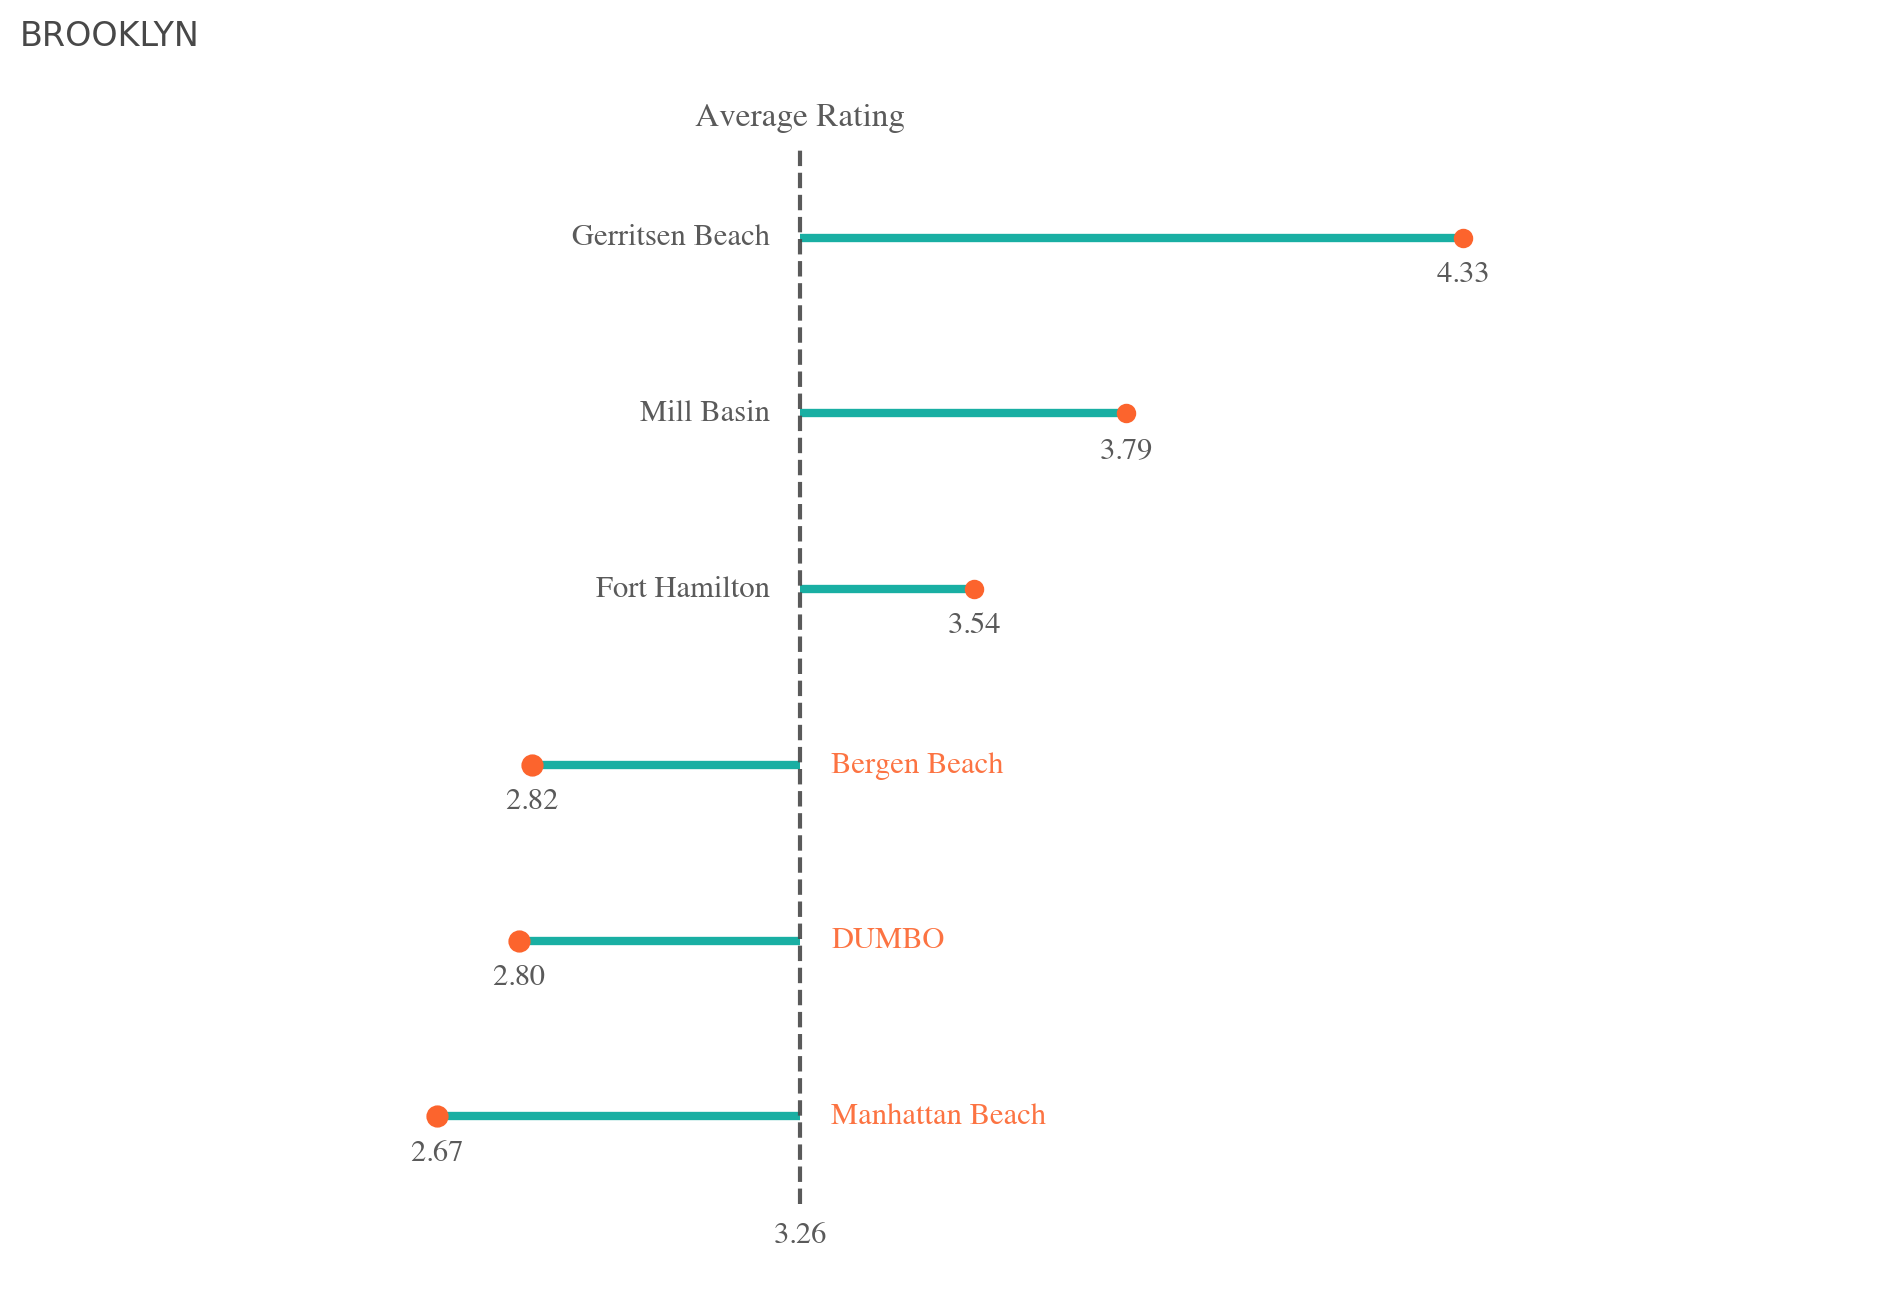

In [ ]:
#Brooklyn

brooklyn = df[df['neighbourhood group'] == 'Brooklyn']
mean = brooklyn['review rate number'].mean()


# mean = 3.257246888142482
fig, ax = plt.subplots(figsize=(12,8))

#Limits
ax.set_xlim(1.99,5.01)
ax.set_ylim(-0.01,7)

#Chart

#Top3
# Fort Hamilton                 3.539216
# Mill Basin                    3.785714
# Gerritsen Beach               4.333333

top3_y = [4, 5, 6]
top3_x = [3.539216,3.785714,4.333333]
top3_names = ['Fort Hamilton', 'Mill Basin', 'Gerritsen Beach']

ax.hlines(y = top3_y, xmin=mean, xmax=top3_x, color='#00A699', alpha=0.9, linewidth=3)
ax.plot( top3_x,top3_y, marker = "o", linewidth = 0, c='#FC642D')


ax.text(mean-0.05,4,'Fort Hamilton',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(3.539216,3.87,'3.54',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(mean-0.05,5,'Mill Basin',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(3.785714,4.87,'3.79',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(mean-0.05,6,'Gerritsen Beach',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(4.333333,5.87,'4.33',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)


#Bottom3
# Manhattan Beach               2.666667
# DUMBO                         2.800000
# Bergen Beach                  2.821429

bottom3_y = [1,2,3]
bottom3_x = [2.666667,2.800000,2.821429]
ax.hlines(y = bottom3_y, xmin=bottom3_x, xmax=mean, color='#00A699', alpha=0.9, linewidth=3)
ax.plot( bottom3_x,bottom3_y, marker = "o", linewidth = 0, c='#FC642D',markersize=7)

ax.text(mean+0.05,1,'Manhattan Beach',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(2.666667,0.87,'2.67',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(mean+0.05,2,'DUMBO',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(2.800000,1.87,'2.80',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(mean+0.05,3,'Bergen Beach',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(2.821429,2.87,'2.82',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)


#Vertical Line
ax.vlines(x=mean,ymin=0.5, ymax=6.5, color='#484848', linestyles='dashed', lw=1.5, alpha=0.9)
ax.text(mean,0.4,f'{mean:04.2f}',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)
ax.text(mean,6.6,'Average Rating',c='#484848', horizontalalignment='center',verticalalignment='bottom',fontsize=12, fontname="Times", weight='bold', alpha=0.9)


#ticks
ax.set_xticks([])
ax.set_yticks([])

#Make the spins invisible
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.title('BROOKLYN',loc='left', c='#484848')
plt.show()



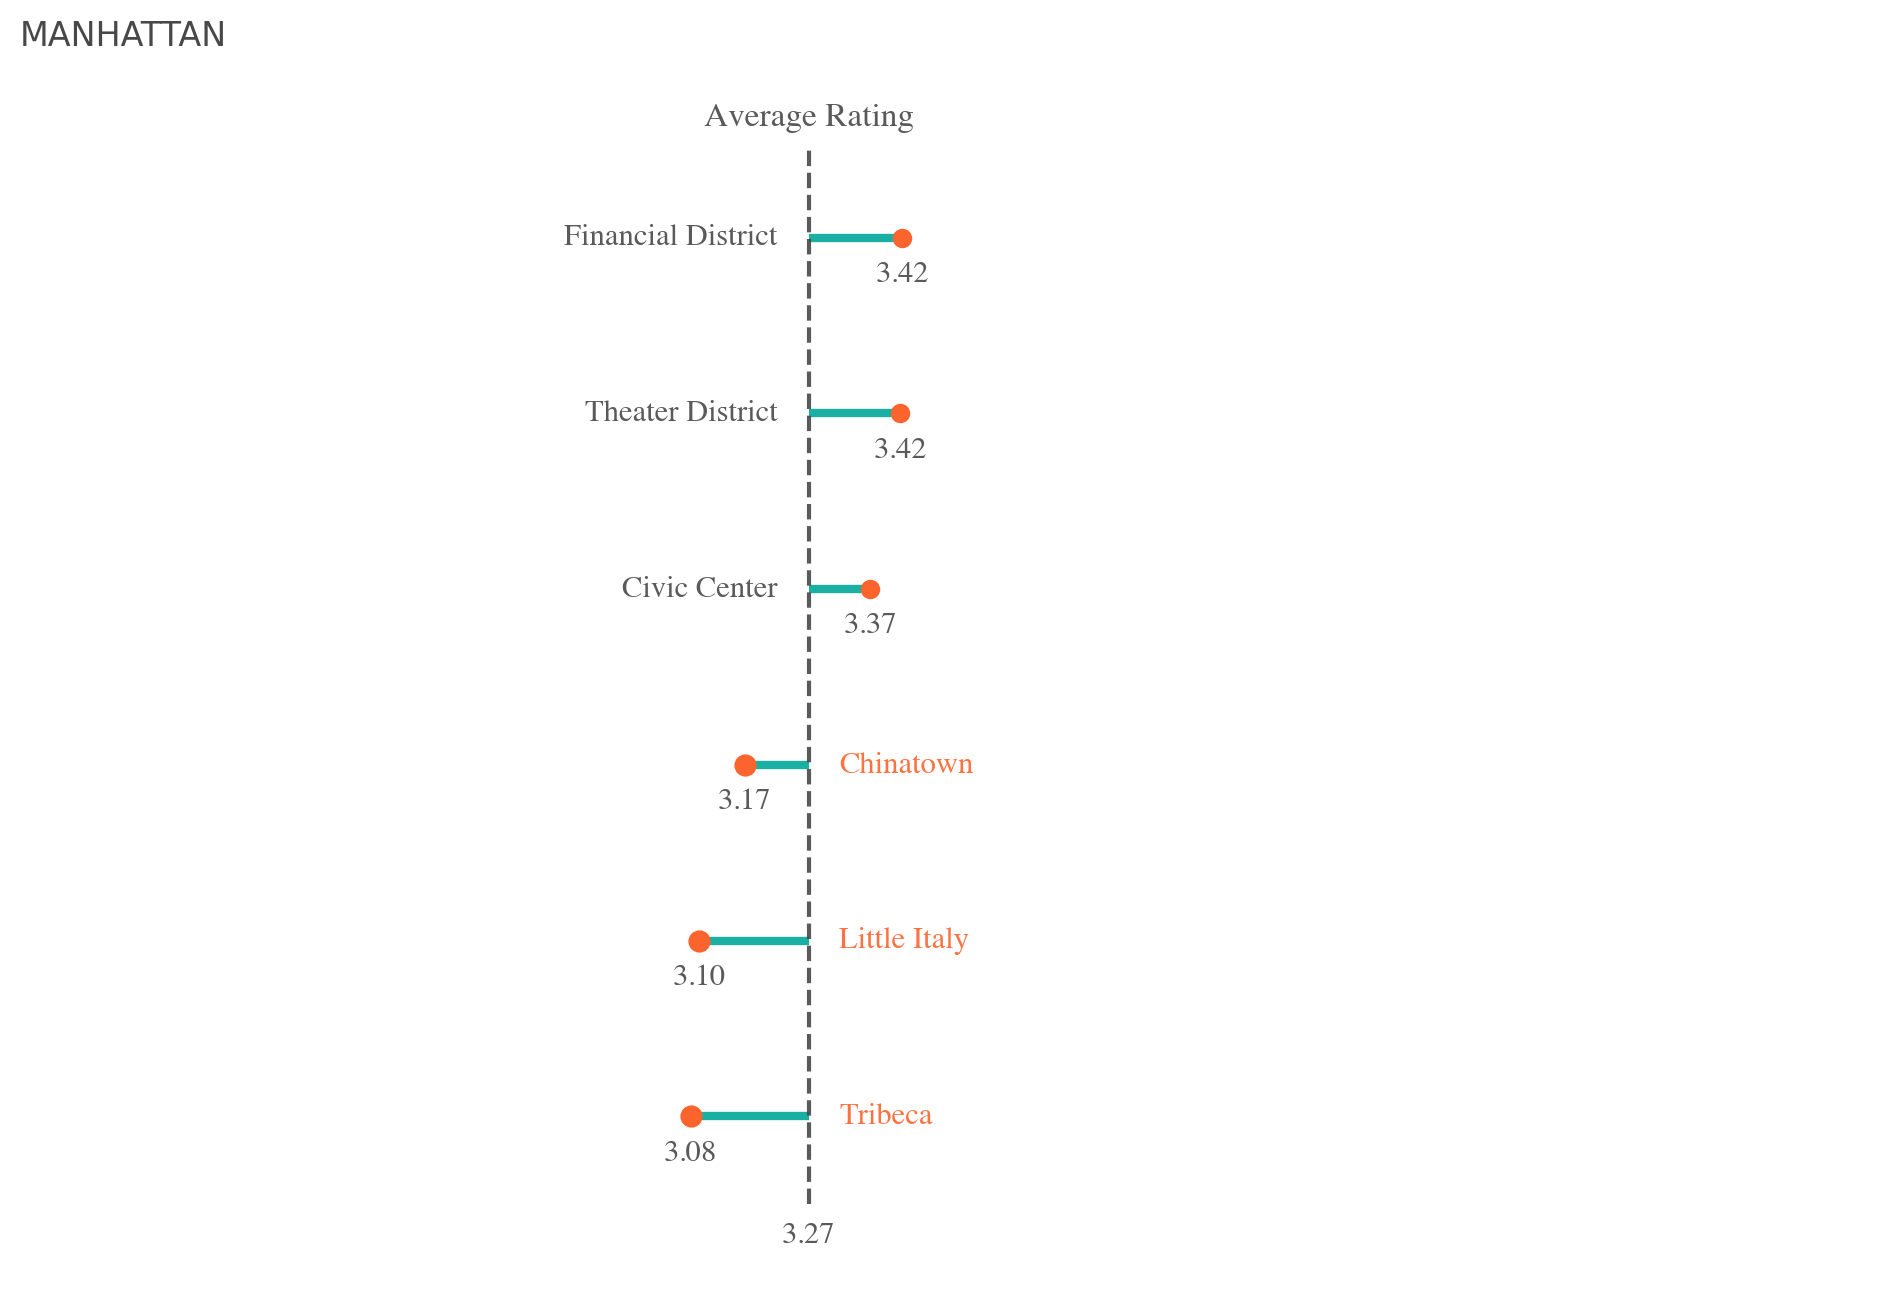

In [ ]:
#MANHATTAN

manhattan = df[df['neighbourhood group'] == 'Manhattan']
mean = manhattan['review rate number'].mean()


# mean = 3.2703686031253727
fig, ax = plt.subplots(figsize=(12,8))

#Limits
ax.set_xlim(1.99,5.01)
ax.set_ylim(-0.01,7)

#Chart

#Top3
# Civic Center                  3.370787
# Theater District              3.419098
# Financial District            3.422535

top3_y = [4, 5, 6]
top3_x = [3.370787,3.419098,3.422535]
top3_names = ['Civic Center', 'Theater District', 'Financial District']

ax.hlines(y = top3_y, xmin=mean, xmax=top3_x, color='#00A699', alpha=0.9, linewidth=3)
ax.plot( top3_x,top3_y, marker = "o", linewidth = 0, c='#FC642D')


ax.text(mean-0.05,4,'Civic Center',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(3.370787,3.87,'3.37',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(mean-0.05,5,'Theater District',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(3.419098,4.87,'3.42',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(mean-0.05,6,'Financial District',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(3.422535,5.87,'3.42',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)


#Bottom3
# Tribeca                       3.079167
# Little Italy                  3.093264
# Chinatown                     3.166410

bottom3_y = [1,2,3]
bottom3_x = [3.079167,3.093264,3.166410]
ax.hlines(y = bottom3_y, xmin=bottom3_x, xmax=mean, color='#00A699', alpha=0.9, linewidth=3)
ax.plot( bottom3_x,bottom3_y, marker = "o", linewidth = 0, c='#FC642D',markersize=7)

ax.text(mean+0.05,1,'Tribeca',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(3.079167,0.87,'3.08',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(mean+0.05,2,'Little Italy',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(3.093264,1.87,'3.10',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(mean+0.05,3,'Chinatown',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(3.166410,2.87,'3.17',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)


#Vertical Line
ax.vlines(x=mean,ymin=0.5, ymax=6.5, color='#484848', linestyles='dashed', lw=1.5, alpha=0.9)
ax.text(mean,0.4,f'{mean:04.2f}',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)
ax.text(mean,6.6,'Average Rating',c='#484848', horizontalalignment='center',verticalalignment='bottom',fontsize=12, fontname="Times", weight='bold', alpha=0.9)


#ticks
ax.set_xticks([])
ax.set_yticks([])

#Make the spins invisible
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.title('MANHATTAN',loc='left', c='#484848')
plt.show()



In [ ]:
queens = df[df['neighbourhood group'] == 'Queens']
mean = queens['review rate number'].mean()
print(mean)
print(queens.groupby('neighbourhood')['review rate number'].mean().sort_values())

3.3150612027674295
neighbourhood
Jamaica Hills                 2.611111
Whitestone                    2.916667
Douglaston                    3.000000
Glendale                      3.062992
Fresh Meadows                 3.072917
Breezy Point                  3.111111
Queens Village                3.173228
Middle Village                3.181818
Edgemere                      3.217391
Flushing                      3.222222
Bayside                       3.227723
Arverne                       3.233503
Astoria                       3.235219
Woodside                      3.235465
Holliswood                    3.250000
Corona                        3.260000
Maspeth                       3.260465
Howard Beach                  3.260870
Belle Harbor                  3.260870
Kew Gardens Hills             3.266667
Cambria Heights               3.271429
Long Island City              3.272358
Jackson Heights               3.274194
Laurelton                     3.283333
Rego Park                     3

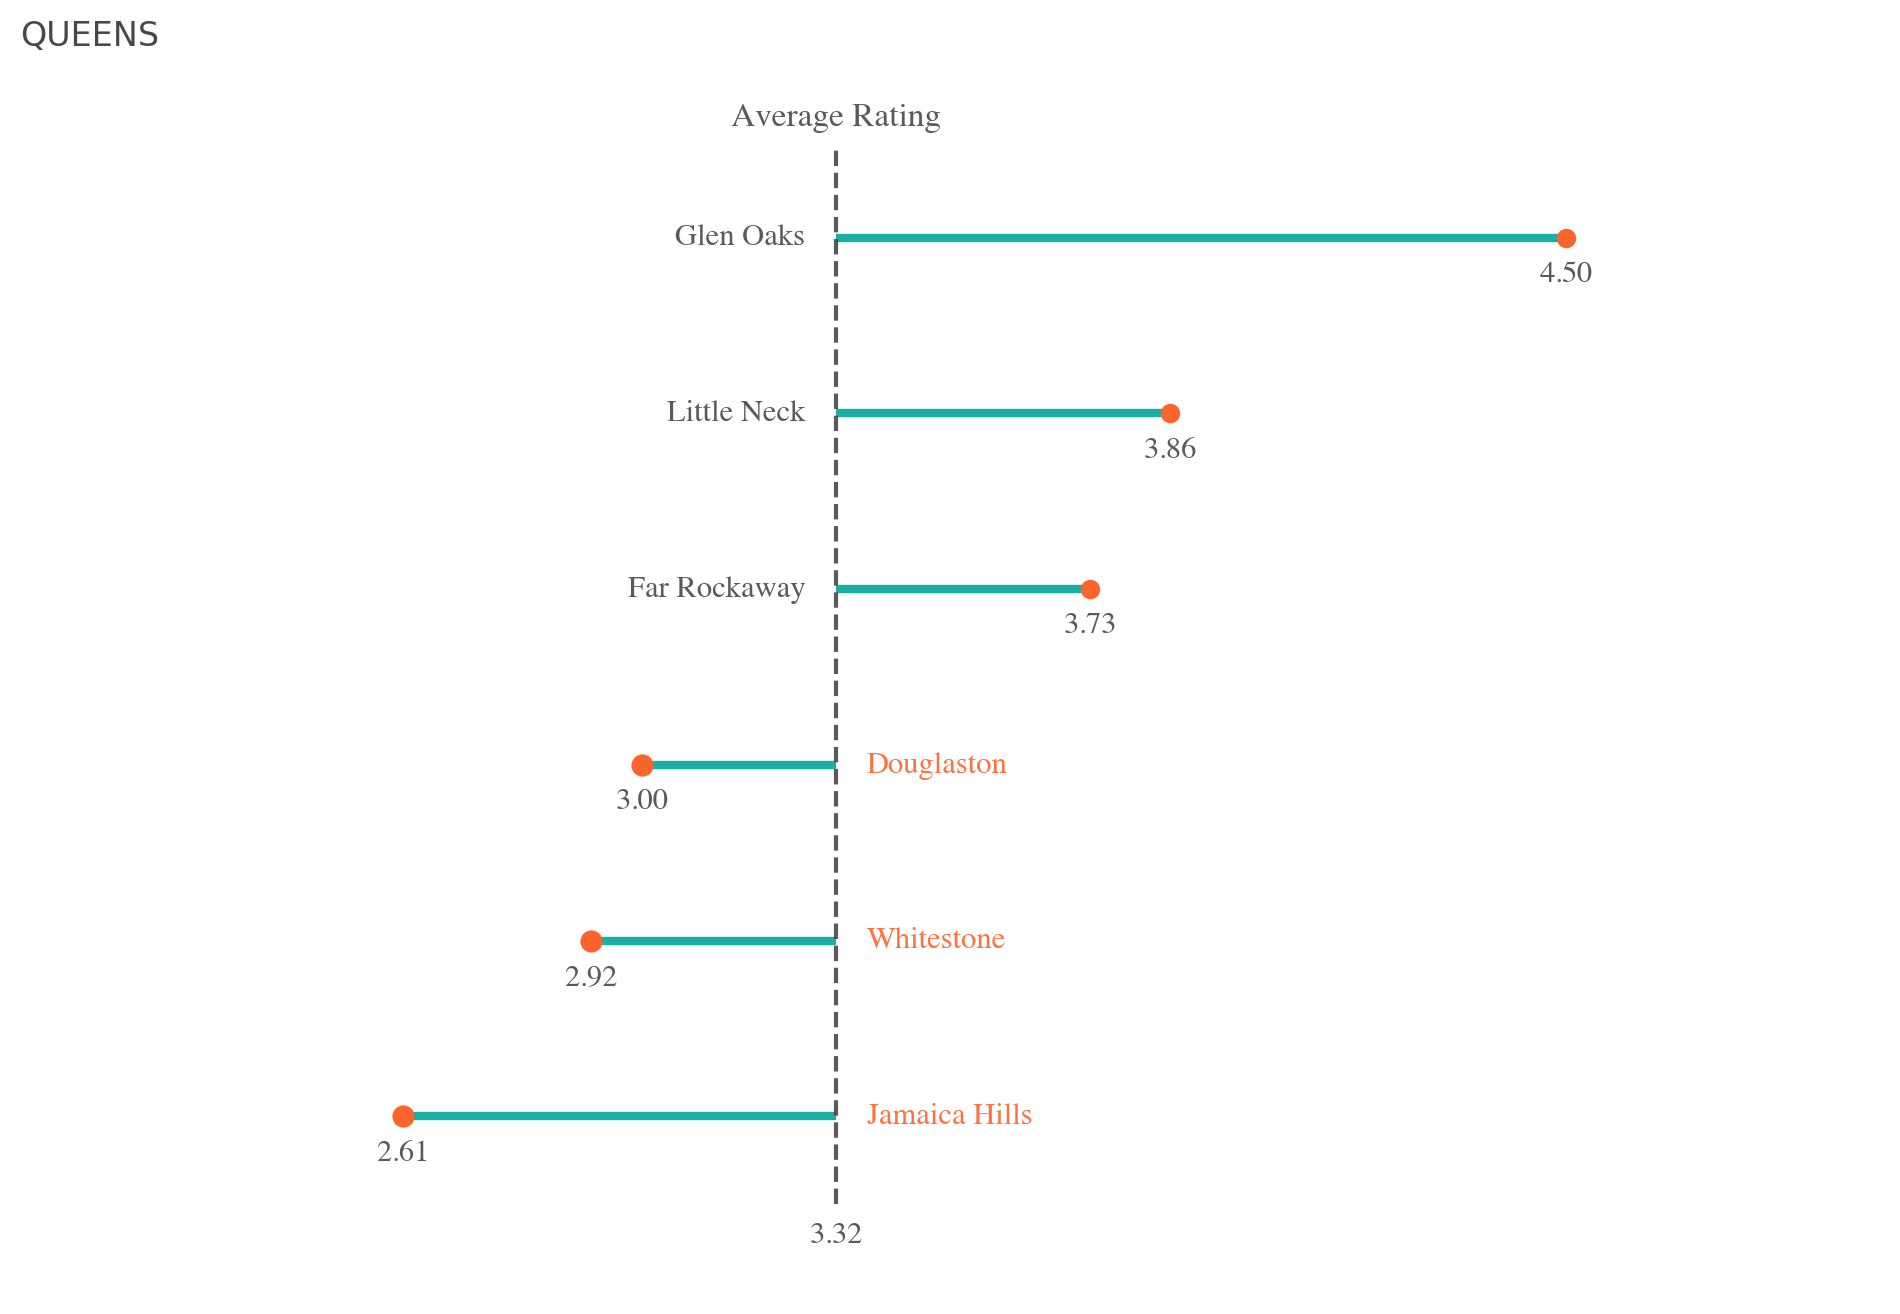

In [ ]:
#QUEENS

queens = df[df['neighbourhood group'] == 'Queens']
mean = queens['review rate number'].mean()


# mean = 3.3150612027674295
fig, ax = plt.subplots(figsize=(12,8))

#Limits
ax.set_xlim(1.99,5.01)
ax.set_ylim(-0.01,7)

#Chart

#Top3
# Far Rockaway                  3.727273
# Little Neck                   3.857143
# Glen Oaks                     4.500000

top3_y = [4, 5, 6]
top3_x = [3.727273,3.857143,4.500000]
top3_names = ['Far Rockaway', 'Little Neck', 'Glen Oaks']

ax.hlines(y = top3_y, xmin=mean, xmax=top3_x, color='#00A699', alpha=0.9, linewidth=3)
ax.plot( top3_x,top3_y, marker = "o", linewidth = 0, c='#FC642D')


ax.text(mean-0.05,4,'Far Rockaway',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(3.727273,3.87,'3.73',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(mean-0.05,5,'Little Neck',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(3.857143,4.87,'3.86',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(mean-0.05,6,'Glen Oaks',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(4.500000,5.87,'4.50',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)


#Bottom3
# Jamaica Hills                 2.611111
# Whitestone                    2.916667
# Douglaston                    3.000000

bottom3_y = [1,2,3]
bottom3_x = [2.611111,2.916667,3.000000]
ax.hlines(y = bottom3_y, xmin=bottom3_x, xmax=mean, color='#00A699', alpha=0.9, linewidth=3)
ax.plot( bottom3_x,bottom3_y, marker = "o", linewidth = 0, c='#FC642D',markersize=7)

ax.text(mean+0.05,1,'Jamaica Hills',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(2.611111,0.87,'2.61',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(mean+0.05,2,'Whitestone',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(2.916667,1.87,'2.92',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(mean+0.05,3,'Douglaston',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(3.000000,2.87,'3.00',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)


#Vertical Line
ax.vlines(x=mean,ymin=0.5, ymax=6.5, color='#484848', linestyles='dashed', lw=1.5, alpha=0.9)
ax.text(mean,0.4,f'{mean:04.2f}',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)
ax.text(mean,6.6,'Average Rating',c='#484848', horizontalalignment='center',verticalalignment='bottom',fontsize=12, fontname="Times", weight='bold', alpha=0.9)


#ticks
ax.set_xticks([])
ax.set_yticks([])

#Make the spins invisible
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.title('QUEENS',loc='left', c='#484848')
plt.show()



In [ ]:
staten_island = df[df['neighbourhood group'] == 'Staten Island']
mean = staten_island['review rate number'].mean()
print(mean)
print(staten_island.groupby('neighbourhood')['review rate number'].mean().sort_values())

3.3745624270711785
neighbourhood
Howland Hook                  1.666667
Bay Terrace, Staten Island    2.000000
Rossville                     2.000000
Chelsea, Staten Island        2.000000
Willowbrook                   2.000000
Fort Wadsworth                2.000000
Tottenville                   2.384615
Lighthouse Hill               2.666667
Graniteville                  2.714286
Grant City                    2.714286
New Brighton                  2.909091
West Brighton                 3.000000
Emerson Hill                  3.000000
Great Kills                   3.000000
Dongan Hills                  3.083333
Prince's Bay                  3.125000
Arden Heights                 3.166667
Castleton Corners             3.181818
Richmondtown                  3.200000
Concord                       3.250000
New Dorp                      3.250000
Mariners Harbor               3.260870
Midland Beach                 3.294118
Tompkinsville                 3.310680
New Springville               3

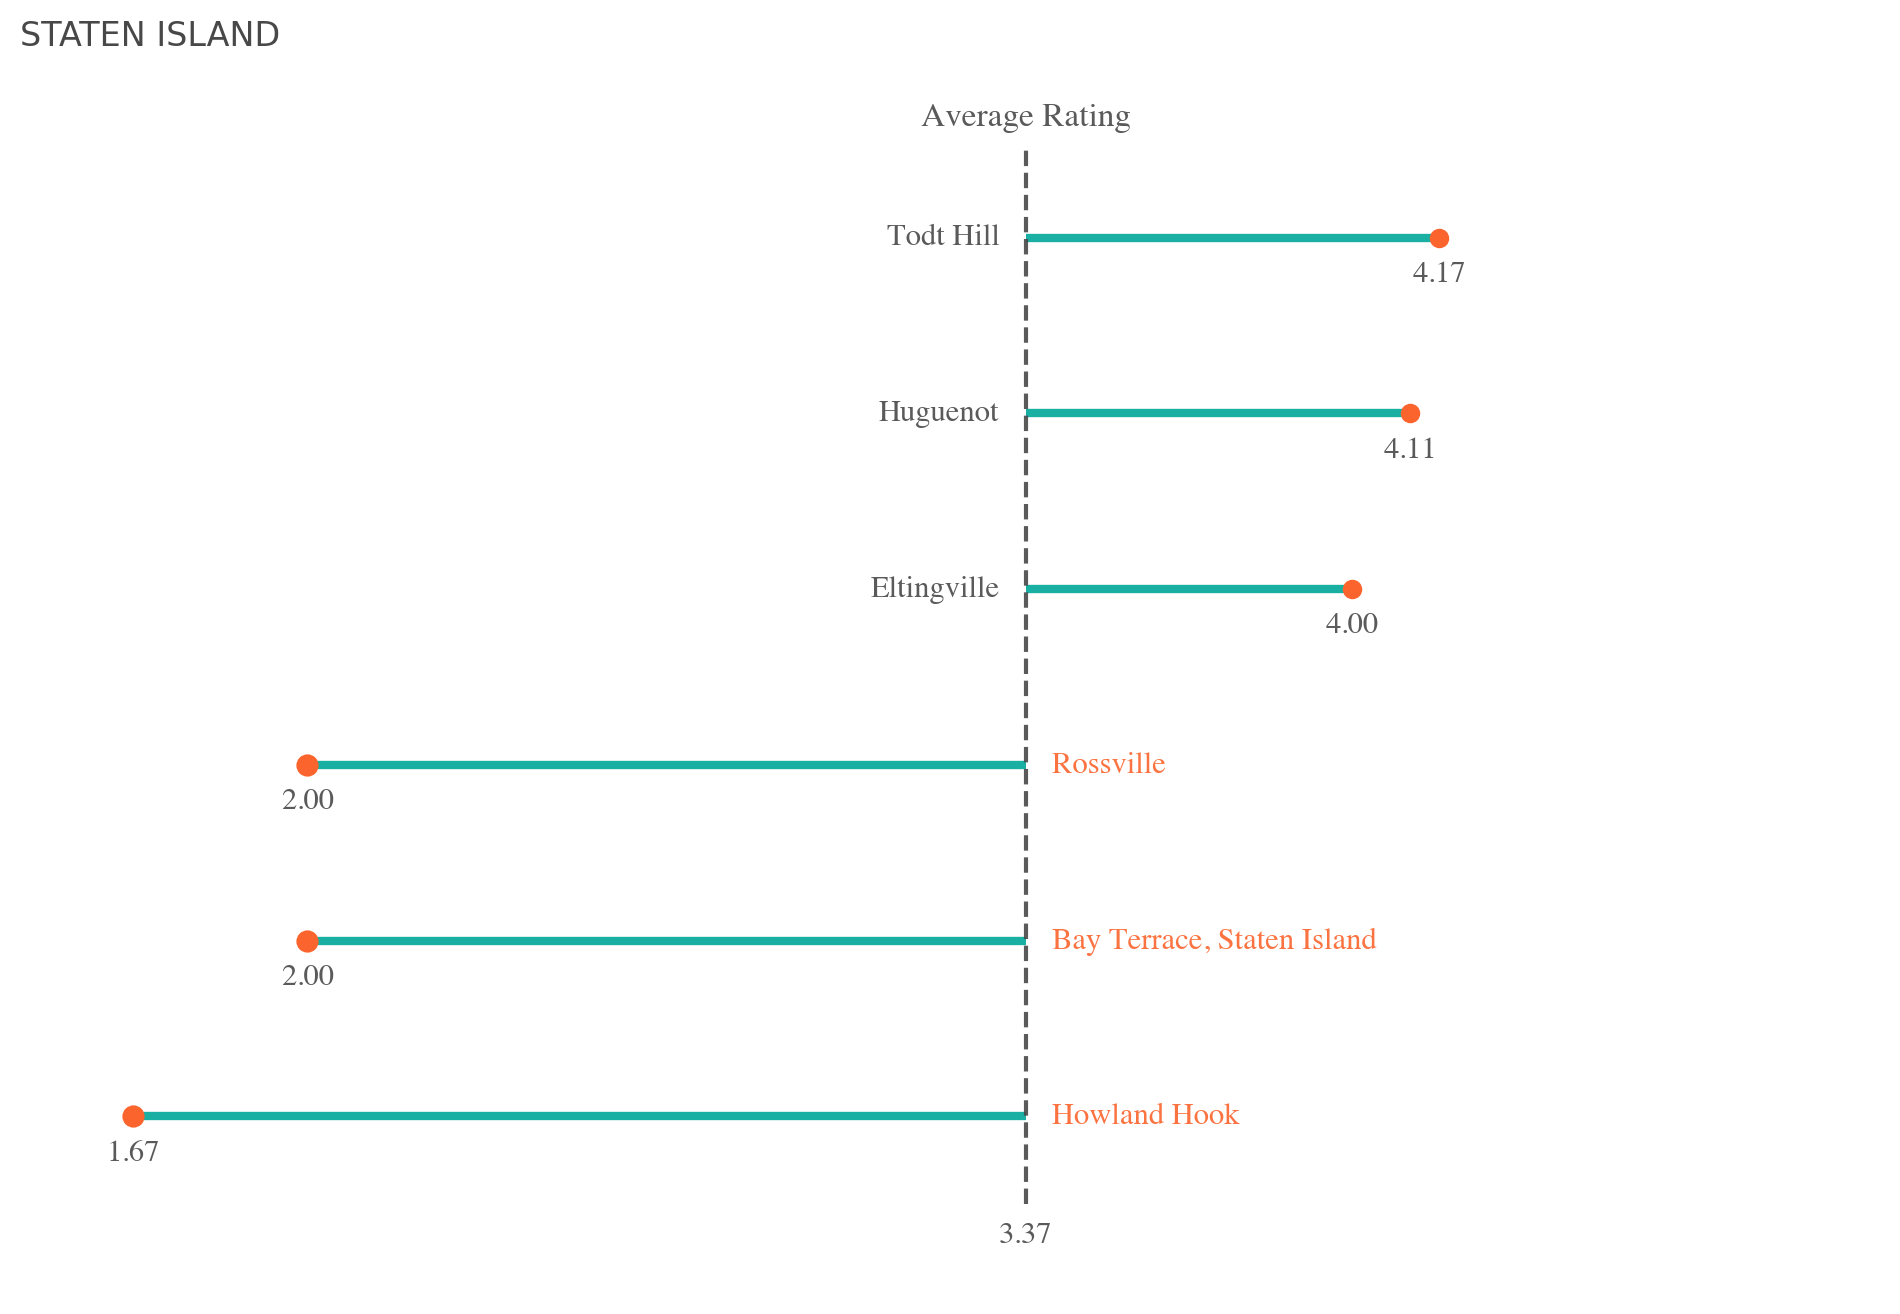

In [ ]:
#STATEN ISLAND

staten_island = df[df['neighbourhood group'] == 'Staten Island']
mean = staten_island['review rate number'].mean()


# mean = 3.3745624270711785
fig, ax = plt.subplots(figsize=(12,8))

#Limits
ax.set_xlim(1.45,5.01)
ax.set_ylim(-0.01,7)

#Chart

#Top3
# Eltingville                   4.000000
# Huguenot                      4.111111
# Todt Hill                     4.166667

top3_y = [4, 5, 6]
top3_x = [4.000000,4.111111,4.166667]
top3_names = ['Eltingville', 'Huguenot', 'Todt Hill']

ax.hlines(y = top3_y, xmin=mean, xmax=top3_x, color='#00A699', alpha=0.9, linewidth=3)
ax.plot( top3_x,top3_y, marker = "o", linewidth = 0, c='#FC642D')


ax.text(mean-0.05,4,'Eltingville',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(4.000000,3.87,'4.00',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(mean-0.05,5,'Huguenot',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(4.111111,4.87,'4.11',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)

ax.text(mean-0.05,6,'Todt Hill',c='#484848', horizontalalignment='right',verticalalignment='center',fontsize=11, fontname="Times",weight='bold', alpha=0.9)
ax.text(4.166667,5.87,'4.17',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold', alpha=0.9)


#Bottom3
# Howland Hook                  1.666667
# Bay Terrace, Staten Island    2.000000
# Rossville                     2.000000

bottom3_y = [1,2,3]
bottom3_x = [1.666667,2.000000,2.000000]
ax.hlines(y = bottom3_y, xmin=bottom3_x, xmax=mean, color='#00A699', alpha=0.9, linewidth=3)
ax.plot( bottom3_x,bottom3_y, marker = "o", linewidth = 0, c='#FC642D',markersize=7)

ax.text(mean+0.05,1,'Howland Hook',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(1.666667,0.87,'1.67',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(mean+0.05,2,'Bay Terrace, Staten Island',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(2.000000,1.87,'2.00',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)

ax.text(mean+0.05,3,'Rossville ',c='#FC642D', horizontalalignment='left',verticalalignment='center',fontsize=11, fontname="Times",weight='bold',  alpha=0.9)
ax.text(2.000000,2.87,'2.00',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)


#Vertical Line
ax.vlines(x=mean,ymin=0.5, ymax=6.5, color='#484848', linestyles='dashed', lw=1.5, alpha=0.9)
ax.text(mean,0.4,f'{mean:04.2f}',c='#484848', horizontalalignment='center',verticalalignment='top',fontsize=11, fontname="Times", weight='bold', alpha=0.9)
ax.text(mean,6.6,'Average Rating',c='#484848', horizontalalignment='center',verticalalignment='bottom',fontsize=12, fontname="Times", weight='bold', alpha=0.9)


#ticks
ax.set_xticks([])
ax.set_yticks([])

#Make the spins invisible
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.title('STATEN ISLAND',loc='left', c='#484848')
plt.show()



In [ ]:
x = df[(df['Building_Age'].astype(float)<= 10) & (df['last review'].dt.year >=2004) & (df['minimum nights'] <= 15)]


x['NAME'] = x['NAME'].astype(str)

x['neighbourhood'] = x['neighbourhood'].astype(str)

x['neighbourhood group'] = x['neighbourhood group'].astype(str)

x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35834 entries, 0 to 102050
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              35834 non-null  category      
 1   NAME                            35834 non-null  object        
 2   host_identity_verified          35749 non-null  category      
 3   neighbourhood group             35834 non-null  object        
 4   neighbourhood                   35834 non-null  object        
 5   lat                             35831 non-null  float64       
 6   long                            35831 non-null  float64       
 7   instant_bookable                35803 non-null  category      
 8   cancellation_policy             35809 non-null  category      
 9   room type                       35834 non-null  category      
 10  Construction year               35834 non-null  category      
 11  price 

/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_75497/3624011610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['NAME'] = x['NAME'].astype(str)
/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_75497/3624011610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['neighbourhood'] = x['neighbourhood'].astype(str)
/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_75497/3624011610.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
#Neighbourhood Included
x['is_neighbourhood_included'] = x.apply(lambda row: row['neighbourhood'].lower() in row['NAME'].lower(), axis=1).astype(int)

print(x.groupby('neighbourhood group')['is_neighbourhood_included'].value_counts())

print(x.groupby(['neighbourhood group','is_neighbourhood_included'])['review rate number'].mean())

print(x.groupby(['is_neighbourhood_included'])['review rate number'].mean())

neighbourhood group  is_neighbourhood_included
Bronx                0                             1026
                     1                               42
Brooklyn             0                            10986
                     1                             4343
Manhattan            0                             9739
                     1                             4498
Queens               0                             4062
                     1                              800
Staten Island        0                              328
                     1                                5
nan                  0                                4
                     1                                1
Name: count, dtype: int64
neighbourhood group  is_neighbourhood_included
Bronx                0                            3.396686
                     1                            3.857143
Brooklyn             0                            3.288367
                     1         

/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_75497/1516986744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['is_neighbourhood_included'] = x.apply(lambda row: row['neighbourhood'].lower() in row['NAME'].lower(), axis=1).astype(int)


In [ ]:
#Neighbourhood Included
pd.set_option('display.max_rows', None)

new_x = x[(x['neighbourhood group']=='Manhattan')]

new_x.groupby(['neighbourhood','is_neighbourhood_included'])['review rate number'].mean()

#Battery Park City = not includes average : 2.56, includes average: 4.00, total count =27 
#Marble Hill =  general average: 2.0, not includes average : 2.00, includes average: 4.3333, total count = 13



neighbourhood        is_neighbourhood_included
Battery Park City    0                            2.560000
                     1                            4.000000
Chelsea              0                            3.286822
                     1                            3.155963
Chinatown            0                            3.063725
                     1                            3.333333
Civic Center         0                            3.166667
East Harlem          0                            3.239569
                     1                            3.427184
East Village         0                            3.196517
                     1                            3.329171
Financial District   0                            3.503513
                     1                            3.509091
Flatiron District    0                            3.381818
Gramercy             0                            3.157534
                     1                            3.341463
Greenwich

In [ ]:
new_x.groupby('neighbourhood')['is_neighbourhood_included'].value_counts()

neighbourhood        is_neighbourhood_included
Battery Park City    0                              25
                     1                               2
Chelsea              1                             436
                     0                             258
Chinatown            0                             204
                     1                              87
Civic Center         0                              24
East Harlem          0                             743
                     1                             103
East Village         1                             881
                     0                             402
Financial District   0                             427
                     1                              55
Flatiron District    0                              55
Gramercy             0                             146
                     1                              82
Greenwich Village    0                             151
                  

In [ ]:
y = df[(df['Building_Age'].astype(float)<= 10) & (df['last review'].dt.year >= 2020) & (df['minimum nights'] <= 15)]

y['NAME'] = y['NAME'].astype(str)

y['neighbourhood'] = y['neighbourhood'].astype(str)

y['neighbourhood group'] = y['neighbourhood group'].astype(str)

#Neighbourhood Included
y['is_neighbourhood_included'] = y.apply(lambda row: row['neighbourhood'].lower() in row['NAME'].lower(), axis=1).astype(int)


print(y['is_neighbourhood_included'].value_counts())

print(y.groupby('neighbourhood group')['is_neighbourhood_included'].value_counts())

print(y.groupby(['neighbourhood group','is_neighbourhood_included'])['review rate number'].mean())

is_neighbourhood_included
0    5294
1    1215
Name: count, dtype: int64
neighbourhood group  is_neighbourhood_included
Bronx                0                             338
                     1                              12
Brooklyn             0                            2068
                     1                             570
Manhattan            0                            1691
                     1                             461
Queens               0                            1095
                     1                             170
Staten Island        0                             102
                     1                               2
Name: count, dtype: int64
neighbourhood group  is_neighbourhood_included
Bronx                0                            3.479290
                     1                            3.583333
Brooklyn             0                            3.520309
                     1                            3.521053
Manhattan            0

/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_75497/2741768969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['NAME'] = y['NAME'].astype(str)
/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_75497/2741768969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['neighbourhood'] = y['neighbourhood'].astype(str)
/var/folders/g8/btdyhprd6l7_z7kmyr6qhzp80000gn/T/ipykernel_75497/2741768969.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
from statistics import variance

Manhattan_variance_before = [3.079167,3.093264,3.166410,3.179872,3.182927,3.189655,3.222520,3.227057,3.235426,3.235897,3.238835,3.240437,3.240502,3.247029,3.250000,3.255639,3.265926,3.283989,3.286957,3.289103,3.301504,3.311066,3.316778,3.317805,3.318182,3.318182,3.323777,3.327434,3.359649,3.370787,3.419098,3.422535]


print ('Manhattan neighbourhoods variance:',variance(Manhattan_variance_before))
print('Manhattan neighbourhoods variance after:', manhattan_removed.groupby('neighbourhood')['review rate number'].mean().var())

print('Bronx neighbourhoods variance:', bronx.groupby('neighbourhood')['review rate number'].mean().var())

print('Brooklyn neighbourhoods variance:', brooklyn.groupby('neighbourhood')['review rate number'].mean().var())

print('Queens neighbourhoods variance:', queens.groupby('neighbourhood')['review rate number'].mean().var())

print('Staten Island neighbourhoods variance:', staten_island.groupby('neighbourhood')['review rate number'].mean().var())

Manhattan neighbourhoods variance: 0.0062233285062893145
Manhattan neighbourhoods variance after: 0.14517717557265106
Bronx neighbourhoods variance: 0.06657333778076624
Brooklyn neighbourhoods variance: 0.06327986272492656
Queens neighbourhoods variance: 0.06502167102925692
Staten Island neighbourhoods variance: 0.43107521383705955
